<a href="https://colab.research.google.com/github/Bel-Baby/DataAnalysisWithPythonTut/blob/master/DataAnalysisWithPythonTut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [801]:
print('Hello World!')

Hello World!


## Numpy
    Let's say we want to use climate data like the temperature, rainfall and humidity in a region to determine if the region is well suited for growing apples. A really simple approach for doing this would be to formulate the relationship between the annual yield of apples(tons per hectare) and the climatic conditions like the average temperature(in degrees Farenheit), rainfall(in milimeters) & average relative humidity(in percentage) as a linear equation.

    yield of apples = w1 * temperature + w2 * rainfall + w3 * humidity

  We're expressing the yield of apples as a weighted sum of the temperature, rainfall and humidity. Obviously, this is an approximation, since the actual relation may not necessarily be linear, but a simple linear model like this often works well in practice.
  
  Based on some statistical analysis of historical data, we might be able to come up with reasonable values for the weights w1, w2, and w3. Here's an example set of values.

In [802]:
w1, w2, w3 = 0.3, 0.2, 0.5

Given some climate data for a region. we can now predict what the yield of apples in the region might look like. Here's some sample data.
      
  | Region | Temp.(F) | Rainfall(mm) | Humidity(%) |
  | --------- | -------- | -------- | -------- |
  | Kanto | 73  | 67 | 43 |
  | Johto | 91 | 88 | 64 |
  | Hoenn | 87 | 134 | 58 |
  | Sinnoh | 102 | 43 | 37 |
  | Unova | 69 | 96 | 70 |

To begin, we can define some variables to record the climate data for a region.

In [803]:
kanto_temp = 73
kanto_rainfall = 67
kanto_humidity = 43

These variables can now be substituted into the linear equation to predict yield of apples in that region.

In [804]:
kanto_yield_apples = kanto_temp * w1 + kanto_rainfall * w2 + kanto_humidity * w3
kanto_yield_apples

56.8

In [805]:
print('The expected yield of apples in Kanto region is {} tons per hectare.'.format(kanto_yield_apples))

The expected yield of apples in Kanto region is 56.8 tons per hectare.


To make it slightly easier to perform the above computation for multiple regions, we can represent the climate data for each region as a vector i.e. a list of numbers.

In [806]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

The three numbers in each vector represent the temperature, rainfall and humidity data respectively. The set of weights to be used in the formula can also be represented as a vector.

In [807]:
weights = [w1, w2, w3]

We can now write a function crop_yield to calculate the yield of apples(or any other crop) given the climate data and the respective weights.

In [808]:
def crop_yield(region, weights):
    result = 0
    for x, w in zip(region, weights):
        result += x * w
    return result

In [409]:
!pip install ipython

##      Going from Python lists to Numpy arrays
        
        The calculation performed by the crop_yield (element-wise multiplication of two vectors, and taking a sum of the results) is also called the dot product of the two vectors. Learn more about dot product here:
        
  [https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length)

        The Numpy library provides a built-in function to perform the dot product of two vectors. However, the lists must first be converted to numpy arrays before we can perform the operation. To begin, let's import the numpy module. It is common practice to import numpy with the alias np.

In [410]:
import numpy as np

Numpy arrays can be created using the np.array function.

In [411]:
kanto = np.array([73, 67, 43])

In [412]:
kanto

array([73, 67, 43])

In [413]:
weights = np.array([w1, w2, w3])

In [414]:
weights

array([0.3, 0.2, 0.5])

In [415]:
type(kanto)

numpy.ndarray

In [416]:
type(weights)

numpy.ndarray

Just like lists, Numpy arrays support the indexing notation []

In [417]:
weights[0]

0.3

In [418]:
kanto[2]

43

## Operating on Numpy arrays

    We can now compute the dot product of the two vectors using the np.dot fucntion

In [419]:
help(np.dot)

Help on _ArrayFunctionDispatcher in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to
      :func:`multiply` and using ``numpy.multiply(a, b)`` or ``a * b`` is
      preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of
      `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    It uses an optimized BLAS library when possible (see `numpy.linalg`).
    
    Parameters
    -----

In [420]:
np.dot(kanto, weights)

56.8

We can achieve same result with lower level operations supported by Numpy arrays:
performing an element-wise multiplicaton and calculating the sum of the resulting numbers.

In [421]:
(kanto * weights).sum()

56.8

The * operator performs an element-wise multiplication of two arrays(assuming they have the same size), and the sum method calculates the sum of numbers in an array.

In [422]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

In [423]:
arr1 * arr2

array([ 4, 10, 18])

In [424]:
arr2.sum()

15

## Benefits of using Numpy arrays

  There are a couple of important benefits of using Numpy arrays instead of Python lists for operating on numerical data:

  * **Ease of use**: You can write small, concise and intuitive mathematical expressions like (kanto * weights).sum() rather than using loops & custom functions like crop_yield.

  * **Performance**: Numpy operations and functions are implemented internally in C++, which makes them so much faster than using Python statements & loops which are interpreted at runtime.

  Here's a quick comparison of dot products done of vectors with a million elements each using Python loops vs Numpy arrays.

In [425]:
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [426]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: user 343 ms, sys: 1.76 ms, total: 345 ms
Wall time: 352 ms


833332333333500000

In [427]:
%%time
np.dot(arr1_np, arr2_np)

CPU times: user 2.17 ms, sys: 0 ns, total: 2.17 ms
Wall time: 2.98 ms


833332333333500000

As you can see, using np.dot is 100 times faster than using a for loop. This makes Numpy especially useful while working with really large datasets with tens of thousands or millions of data points.

## Multi-dimensional Numpy arrays

  We can now go one step further, and represent the climate data for all the regions together using a single 2-dimensional Numpy array.

In [428]:
climate_data = np.array([[73, 67, 43],
                        [91, 88, 64],
                        [87, 134, 58],
                        [102, 43, 37],
                        [69, 96, 70]])

In [429]:
climate_data

array([[ 73,  67,  43],
       [ 91,  88,  64],
       [ 87, 134,  58],
       [102,  43,  37],
       [ 69,  96,  70]])

If you've taken a linear algebra class in high school, you might recognize the above 2-d array as a matrix with 5 rows(one for each region) and 3 columns(containing values for temperature, rainfall and humidity).

Numpy arrays can have any number of dimensions, and different lengths along each dimension. We can inspect the length along each dimension using the .shape property of an array.

In [430]:
# 2D array (matrix)
climate_data.shape

(5, 3)

In [431]:
weights

array([0.3, 0.2, 0.5])

In [432]:
# 1D array (matrix)
weights.shape

(3,)

In [433]:
# 3D array (matrix)
arr3 = np.array([
    [[11, 12, 13],
     [13, 14, 15]],
    [[15, 16, 17],
     [17, 18, 19.5]]])

In [434]:
arr3.shape

(2, 2, 3)

All the elements in a numpy array have the same datatype. You can check the data type of an array using the .dtype property.

In [435]:
weights.dtype

dtype('float64')

In [436]:
climate_data.dtype

dtype('int64')

If an array contains even a single floating point number, all the other elements are also converted to floats.

In [437]:
arr3.dtype

dtype('float64')

We can now compute the predicted yields of apples in all the regions, using a single matrix multiplication between climate_data(a 5 x 3 matrix) and weights (a vector of length 3).
Here's what it looks like visually:

73 , 67 , 43  | x | w11

91 , 88 , 64  | x | w12

69 , 96 , 70  | x | w13


You can learn about matrices and matrix multiplication by watching the first 3-4 videos of this playlist: [https://www.youtube.com/watch/?v=xyAuNHPsq-g&list=PLFDOEB975BAOCC1EO&index=1](https://www.youtube.com/watch/?v=xyAuNHPsq-g&list=PLFDOEB975BAOCC1EO&index=1)

We can use the np.matmul function from Numpy, or simply use @ operator to perform matrix multiplication.

In [438]:
np.matmul(climate_data, weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [439]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

## Working with CSV data files

Numpy also provides helper functions reading from & writing to files. Let's download a file climate.txt which contains 10,000 climate data(temperature, rainfall & humidity) in the following format:

    temperature,rainfall,humidity
    25.00,76.00,99.00
    39.00,65.00,70.00
    59.00,45.00,77.00
    84.00,63.00,38.00
    66.00,50.00,52.00
    41.00,94.00,77.00
    91.00,57.00,96.00
    49.00,96.00,99.00
    67.00,20.00,28.00
    '''

This format of storing data is known as comma separated values or CSV.
    
    CSVs : A comma-separated values(CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data(numbers and text) in plain text, in which case each line will have the same number of fields.(Wikipedia)

To read this file into a numpy array, we can use the genfromtxt function.

In [440]:
'''import urllib.request
urllib.request.urlretrieve(
    'https://hub.jovian.ml/wp-content/uploads/2020/08/climate.csv',
    'climate.txt')'''

import urllib.request
urllib.request.urlretrieve(
  'https://corgis-edu.github.io/corgis/datasets/csv/weather/weather.csv', 'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x7e9aa6263f70>)

In [441]:
#climate_data = np.genfromtxt('climate.txt', delimiter=',', skip_header=1,
#                             usecols=(0, 2, 10), dtype=float, invalid_raise=True)

def is_float(value):
  """Checks if a string can be converted to a float."""
  try:
    float(value.strip('"'))
    return True
  except ValueError:
    return False

numerical_data = []
with open('climate.txt', 'r') as file:
  next(file)  # Skip the header row
  for line in file:
    values = line.strip().split(',')
    numerical_row = [float(value.strip('"')) for value in values if is_float(value)]
    numerical_data.append(numerical_row)

climate_data = np.array(numerical_data)
print(climate_data)

[[ 0.    1.    3.   ... 32.   33.    4.33]
 [ 0.    1.    3.   ... 31.   32.    3.86]
 [ 0.16  1.    3.   ... 41.   35.    9.73]
 ...
 [ 0.    1.    1.   ...  4.   26.    1.65]
 [ 0.06  1.    1.   ... 13.   24.   18.16]
 [ 0.1   1.    1.   ...  8.   23.    7.51]]


In [442]:
climate_data

array([[ 0.  ,  1.  ,  3.  , ..., 32.  , 33.  ,  4.33],
       [ 0.  ,  1.  ,  3.  , ..., 31.  , 32.  ,  3.86],
       [ 0.16,  1.  ,  3.  , ..., 41.  , 35.  ,  9.73],
       ...,
       [ 0.  ,  1.  ,  1.  , ...,  4.  , 26.  ,  1.65],
       [ 0.06,  1.  ,  1.  , ..., 13.  , 24.  , 18.16],
       [ 0.1 ,  1.  ,  1.  , ...,  8.  , 23.  ,  7.51]])

In [443]:
climate_data.shape

(16743, 9)

We can now use a matrix multiplication operator @ to predict the yield of apples for the entire dataset using a given set of weights.

In [444]:
weights = np.array([0.3, 0.2, 0.5])

In [445]:
# Transpose the weights array to make it a column vector (9, 1)
'''By reshaping the weights array using .reshape(-1, 1), we convert it into a column vector with 3 rows and 1 column. This makes it compatible for matrix multiplication with climate_data.
After this change, the yields variable will contain a (16743, 1) shaped array representing the weighted yields calculated for each data point in climate_data.'''
weights = np.array([0.3, 0.2, 0.5]).reshape(-1, 1)

In [446]:
#yields = climate_data @ weights
# Calculate the weighted yields
yields = climate_data[:, :3] @ weights
# Select the first 3 columns of climate_data to match the dimensions of weights for matrix multiplication.

In [447]:
yields

array([[1.7  ],
       [1.7  ],
       [1.748],
       ...,
       [0.7  ],
       [0.718],
       [0.73 ]])

In [448]:
yields.shape

(16743, 1)

We can now add the yields back to climat_data as a fourth column using the np.concatenate function.

In [449]:
#climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis=1)
# Check the shape of climate_data
print(climate_data.shape)

# Reshape yields to have the same number of rows as climate_data
yields_reshaped = yields.reshape(climate_data.shape[0], 1)

# Concatenate the arrays
climate_results = np.concatenate((climate_data, yields_reshaped), axis=1)

(16743, 9)


In [450]:
climate_results

array([[ 0.   ,  1.   ,  3.   , ..., 33.   ,  4.33 ,  1.7  ],
       [ 0.   ,  1.   ,  3.   , ..., 32.   ,  3.86 ,  1.7  ],
       [ 0.16 ,  1.   ,  3.   , ..., 35.   ,  9.73 ,  1.748],
       ...,
       [ 0.   ,  1.   ,  1.   , ..., 26.   ,  1.65 ,  0.7  ],
       [ 0.06 ,  1.   ,  1.   , ..., 24.   , 18.16 ,  0.718],
       [ 0.1  ,  1.   ,  1.   , ..., 23.   ,  7.51 ,  0.73 ]])

There are a couple of subtleties here:
* We need to provide the axis argument to np.concatenate to specify the dimension along with concatenation should be performed.
* The arrays being concatenated should have the same number of dimensions, and the same length along each dimension, except the one along which concatenation is being performed. We use the np.reshape function here to change the shape of yields from (10000,) to (10000,1).

The best way to understand what a numpy function does is to experiment with it and read the documentation using help function to learn about it's arguments & return values.

Let's write the final results from our computation above back to a file using the np.savetxt function.

In [451]:
climate_results

array([[ 0.   ,  1.   ,  3.   , ..., 33.   ,  4.33 ,  1.7  ],
       [ 0.   ,  1.   ,  3.   , ..., 32.   ,  3.86 ,  1.7  ],
       [ 0.16 ,  1.   ,  3.   , ..., 35.   ,  9.73 ,  1.748],
       ...,
       [ 0.   ,  1.   ,  1.   , ..., 26.   ,  1.65 ,  0.7  ],
       [ 0.06 ,  1.   ,  1.   , ..., 24.   , 18.16 ,  0.718],
       [ 0.1  ,  1.   ,  1.   , ..., 23.   ,  7.51 ,  0.73 ]])

In [452]:
np.savetxt('climate_results.txt',
           climate_results,
           fmt='%.2f',
           delimiter=',',
           header='temperature,rainfall,humidity,yield_apples',
           comments='')

The results are written back in the CSV format to the file climate_results.txt

Numpy provides hundreds of functions for performing operations on arrays. Here are some common functions:

* Mathematics: np.sum, np.exp, np.round, arithmetic operators
* Array manipulation: np.reshape, np.stack, np.concatenate, np.split
* Linear Algebra: np.matmul, np.dot, np.transpose, np.egivals
* Statistics: np.mean, np.median, np.std, np.max

**How to find function you need?** Since Numpy  offers hundreds of functions for operating onn arrays, it can sometimes be hard to find exactly what you need. The easiest way to find the right function is to do a web search e.g. searching for "How to join numpy arrays".

You can find a full list of array functions here: [https://numpy.org/docs/stable/reference/routines.html](https://numpy.org/docs/stable/reference/routines.html)

# Arithmetic operations and broadcasting

Numpy arrays support arithmetic operators like +, -, * e.t.c. You can perform an arithmetic operation with a single number(also called scaler), or with another array of the same shape. This makes it really easy to write mathematical expressions with multi-dimensional arrays.

In [453]:
arr2 = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 1, 2, 3]])

In [454]:
arr3 = np.array([[11, 12, 13, 14],
                 [15, 16, 17, 18],
                 [19, 11, 12, 13]])

In [455]:
# Adding a scalar
arr2 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [456]:
# Element-wise subtraction
arr3 - arr2

array([[10, 10, 10, 10],
       [10, 10, 10, 10],
       [10, 10, 10, 10]])

In [457]:
# Division by scalar
arr2 / 2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [458]:
# Element-wise multiplication
arr2 * arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [459]:
# Modulus with scalar
arr2 % 4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]])

Numpy arrays also support broadcasting, which allows arithmetic operations between two array having a different number of dimensions, but compatible shapes. let's look at an example to see how it works.

In [460]:
arr2 = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 1, 2, 3]])

In [461]:
arr2.shape

(3, 4)

In [462]:
arr4 = np.array([4, 5, 6, 7])

In [463]:
arr4.shape

(4,)

In [464]:
arr2 + arr4

array([[ 5,  7,  9, 11],
       [ 9, 11, 13, 15],
       [13,  6,  8, 10]])

When the expression arr2 + arr4 is evaluated, arr4 (which has the shape (4,)) is replicated 3 times to match the shape (3, 4) of arr2. This is pretty useful, because numpy performs the replication without actually creating 3 copies of the smaller dimension array.

Broadcasting only works if one of the arrays can be replicated to match the shape of the other array.

In [465]:
arr5 = np.array([7, 8])

In [466]:
arr5.shape

(2,)

In [467]:
# arr2 + arr5

In the above example, even if arr5 is replicated 3 times, it will not match the shape of arr2, hence arr2 + arr5 cannot be evaluated successfully.Learn more about broadcasting here:
[https://numpy.org/doc/stable/user/basics.broadcasting.html](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Numpy arrays also support comparison operations like ==, !=, > e.t.c.The result is an array of booleans.

In [468]:
arr1 = np.array([[1, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])

In [469]:
arr1 == arr2

array([[False,  True,  True],
       [False, False,  True]])

In [470]:
arr1 != arr2

array([[ True, False, False],
       [ True,  True, False]])

In [471]:
arr1 >= arr2

array([[False,  True,  True],
       [ True,  True,  True]])

In [472]:
arr1 < arr2

array([[ True, False, False],
       [False, False, False]])

A common use case for this is to count the number of equal elements in two arrays using the sum method. Remember that True evaluates to 1 and False evaluates to 0 when booleans are used in arithmetic operations.

In [473]:
(arr1 == arr2).sum()

3

## Array indexing and slicing

Numpy extends Python's list indexing notation using [] to multiple dimensions in a fairly intuitive fashion. You can provide a comma separated list of indices or ranges to select a specific element or subarray(also called slice) from a numpy array.

In [474]:
arr3 = np.array([
    [[11, 12, 13, 14],
     [13, 14, 15, 19]],

    [[15, 16, 17, 21],
     [63, 92, 36, 18]],

    [[98, 32, 81, 23],
     [17, 18, 19.5, 43]]])

In [475]:
arr3.shape

(3, 2, 4)

In [476]:
# Single element indexing
arr3[1, 1, 2]

36.0

In [477]:
# Subarray using ranges
arr3[1:, 0:1, :2]

array([[[15., 16.]],

       [[98., 32.]]])

In [478]:
# Mixing indices and ranges
arr3[1:, 1, 3]

array([18., 43.])

In [479]:
# Using fewer indices
arr3[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [480]:
# Mixing fewer indices and ranges
arr3[:2, 1,]

array([[13., 14., 15., 19.],
       [63., 92., 36., 18.]])

In [481]:
# Using too many indices
#arr3[1, 3, 2, 1]

## Other ways of creating Numpy arrays

Numpy also provides some handy functions to create arrays of desired shape with fixed or random values. Check out the official documentation or use the help function to learn more about the following functions.

In [482]:
# All Zeroes
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [483]:
# All ones
np.ones([2, 2, 3])

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [484]:
# Identify matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [485]:
# Random vector
np.random.rand(5)

array([0.89719711, 0.76040548, 0.942472  , 0.70221918, 0.01645478])

In [486]:
# Random matrix
np.random.randn(2, 3) # rand vs randn - What's the difference?

array([[ 0.1219053 , -1.06510716, -0.10563555],
       [ 0.13458609, -0.75466794, -0.19402846]])

In [487]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [488]:
# Range with start, end and step
np.arange(10, 90, 3)

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88])

In [489]:
# Equally spaced numbers in a range
np.linspace(3, 27, 9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

# Reading from and Writing to files using Python

## Part 5 of " A Gentle Introduction to Programming with Python"

This tutorial is the fifth in a series on introduction to programming using the Python language. These tutorials takes a practical coding-based approach, and the best way to learn the material is to execute the code and experiment with the examples.

## Interacting with the OS and filesystem

The os module in Python provides many functions for interacting with the OS and the filesystem. Let's import it and try out some examples.

In [490]:
import os

We can check the present working directory using the os.getcwd function.

In [491]:
os.getcwd()

'/content'

To get the list of files in a directory, use os.listdir. You can pass an absolute or relative path of a directory as the argument to the function.

In [492]:
help(os.listdir)

Help on built-in function listdir in module posix:

listdir(path=None)
    Return a list containing the names of the files in the directory.
    
    path can be specified as either str, bytes, or a path-like object.  If path is bytes,
      the filenames returned will also be bytes; in all other circumstances
      the filenames returned will be str.
    If path is None, uses the path='.'.
    On some platforms, path may also be specified as an open file descriptor;\
      the file descriptor must refer to a directory.
      If this functionality is unavailable, using it raises NotImplementedError.
    
    The list is in arbitrary order.  It does not include the special
    entries '.' and '..' even if they are present in the directory.



In [493]:
os.listdir('.') # relative path

['.config',
 'climate_results.txt',
 'stackoverflow-developer-survey-2020',
 'climate.txt',
 'data',
 'sample_data']

In [494]:
os.listdir('/usr') # absolute path

['local',
 'share',
 'libx32',
 'bin',
 'libexec',
 'include',
 'lib32',
 'games',
 'lib',
 'lib64',
 'sbin',
 'src',
 'colab',
 'grte']

A new directory can be created using os.makedirs.
let's create a new directory called data, where we'll later download some files.

In [495]:
os.makedirs('./data', exist_ok=True)

Can you figure out what the argument exist_ok does? Try using the help function or read the documentation.

Let's verify that the directory was infact created and is currently empty.

In [496]:
'data' in os.listdir('.')

True

In [497]:
os.listdir('./data')

[]


Let us download some files into the data directory using the urllib module.

In [498]:
url1 = 'https://hub.jovian.ml/wp-content/uploads/2020/08/loans1.txt'
url2 = 'https://hub.jovian.ml/wp-content/uploads/2020/08/loans2.txt'
url3 = 'https://hub.jovian.ml/wp-content/uploads/2020/08/loans3.txt'

In [499]:
import urllib.request

In [500]:
#urllib.request.urlretrieve(url1, './data/loans1.txt')

In [501]:
#urllib.request.urlretrieve(url2, './data/loans2.txt')

In [502]:
#urllib.request.urlretrieve(url3, './data/loans3.txt')


Let's verify that the files were downloaded.

In [503]:
os.listdir('./data')

[]

## Reading from a file
To read the contents of a file, we first need to open the file using the built-in open function. The open function returns a file object, provides several methods for interacting with the contents of the file. It also accepts a mode argument

In [504]:
#file1 = open('./data/loans1.txt', mode='r')

The open function also accepts a mode argument to specify how we can interact with the file. The following options are supported:

================        ========================================================
Character Meaning

----------------        --------------------------------------------------------
'r'       Open for reading (default)
'w'       Open for writing, truncating the file first
'x'       Create new file and open it for writing
'a'       Open for writing, appending to the end of the file if it exists
'b'       Binary mode
't'       Text mode(default)
'+'       Open a disk file for updating( reading and writing)
'U'       Universal newline mode(deprecated)

================        ========================================================

To view the contents of the file we can use the read method of the file object.

In [505]:
#file1_contents = file1.read()

In [506]:
#print(file1_contents)

The file contains information about loans. It is a set of comma-separated values(CSV).

The first line of the file is a header, which indicates what each of the numbers on the remaining lines represnt. Each of the remaining lines provides information about a loan. Thus, the second line 10000,36,0.08,20000 represents a loan with:

* An amount of $10000,

* Duration of 36 months,

* Rate of interest of 8% per annum, and

* A down payment of $20000

The CSV is a common file format used for sharing data for analysis and visualization. Over the course of this tutorial, we will read data from these CSV files, process it, and write the results back to files. Before we continue, let's close the file using the close method(otherwise Python will continue to hold the entire file in the RAM)

In [507]:
#file1.close()

Once a file is closed, it can no longer be read.

## Closing file automatically using with

To make it easy to automatically close a file once you are done processing it, you can open it using the with statement.

In [508]:
'''with open('./data/loans2.txt') as file2:
    file2_contents = file2.read()
    print(file2_contents)'''

"with open('./data/loans2.txt') as file2:\n    file2_contents = file2.read()\n    print(file2_contents)"

Once the statements within the with block are executed, the .close method on file2 is automatically invoked. Let's verify this by trying to read from the file object again.

In [509]:
#file2.read()

## Reading a file line by line

File objects provide a readlines method to read a file line-by-line.

In [510]:
'''with open('./data/loans3.txt', 'r') as file3:
    file3_lines = file3.readlines()'''

"with open('./data/loans3.txt', 'r') as file3:\n    file3_lines = file3.readlines()"

In [511]:
#file3_lines

## Processing data from files

Before performing any operations on the data stored in a file, we need to convert the contents of the file from one large string into Python data types. For the file loans1.txt containing information about loans in a CSV format, we can do the following:

* Read the file line by line

* Parse the first line to get list of the column names and headers

* Split each remaining line and convert each value to a float

* Create a dictionary for each loan using the headers as keys

* Create a list of dictionaries to keep track of all the lines

Since we will perform the operations for multiple files, it would be useful to define a function read_csv to do this. We'll also define some helper functions to build up the functionality step by step.

Let's start by defining a function parse_header which takes a line as input and returns a list of column headers.

In [512]:
def parse_headers(header_line):
    return header_line.strip().split(',')

The strip method removes any extra spaces and thr newline character \n, and split method breaks a string into a list using the given separator(, in this case).

In [513]:
#file3_lines[0]

In [514]:
#headers = parse_headers(file3_lines[0])

In [515]:
#headers

Next, let's define a function parse_values which takes a line containing some data, and returns a list of floating point numbers.

In [516]:
def parse_values(data_line):
    values = []
    for item in data_line.strip().split(','):
        values.append(float(item))
    return values

In [517]:
#file3_lines[2]

In [518]:
#parse_values(file3_lines[2])

The values were parsed and converted to floating point numbers, as expected. Let's try it for another line in the file, which does not contain a value for the down payment.

In [519]:
#file3_lines[1]

In [520]:
#parse_values(file3_lines[1])

This leads to a ValueError because the empty string '' cannot be converted to float. We can enhance the parse_function to handle this edge case.

In [521]:
def parse_values(data_line):
    values = []
    for item in data_line.strip().split(','):
        if item == '':
            values.append(0.0)
        else:
            values.append(float(item))
    return

In [522]:
#file3_lines[1]

In [523]:
#parse_values(file3_lines[1])

Next, let's define a function create_item_dict which takes a list of values and a list of headers as inputs, and returns a dictionary with the values associated with their respective headers as keys.

In [524]:
def create_item_dict(values, headers):
    result = {}
    for value, header in zip(values, headers):
        result[header] = value
    return result

Can you figure out what the Python built-in function zip does? Try out an example, or read the documentation.

In [525]:
for item in zip([1,2,3], ['a', 'b', 'c']):
    print(item)

(1, 'a')
(2, 'b')
(3, 'c')


Let's try out create_item_dict with a couple of examples.

In [526]:
#file3_lines[1]

In [527]:
#values1 = parse_values(file3_lines[1])

In [528]:
#headers

In [529]:
#create_item_dict(values1, headers)

In [530]:
#file3_lines[2]

In [531]:
'''values2 = parse_values(file3_lines[2])
create_item_dict(values2, headers)'''

'values2 = parse_values(file3_lines[2])\ncreate_item_dict(values2, headers)'

As expected, the values & header are combined to create a dictionary with the appropriate key-value pairs.

We're now ready to put it all together and define the read_csv function.

In [532]:
def read_csv(path):
    result = []
    # Open the file in read mode
    with open(path, 'r') as f:
        # Get a list of lines
        lines = f.readlines()
        # Parse the header
        headers = parse_headers(lines[0])
        # Loop over the remaining lines
        for data_line in lines[1:]:
            # Parse the values
            values = parse_values(data_line)
            # Create a dictionary using values & headers
            item_dict = create_item_dict(values, headers)
            # Add the dictionary to the result
            result.append(item_dict)
    return result

Let's try it out!

In [533]:
'''with open('./data/loans2.txt') as file2:
    print(file2.read())'''

"with open('./data/loans2.txt') as file2:\n    print(file2.read())"

In [534]:
#read_csv('./data/loans2.txt')

The file is read and converted to a list of dictionaries, as expected. The read_csv file is generic enough that it can parse any file in the CSV format, with any number of rows or columns. Here's the full code for read_csv along with helper functions:

In [535]:
def parse_headers(header_line):
    return header_line.strip().split(',')

def parse_values(data_line):
    values = []
    for item in data_line.strip().split(','):
        if item == '':
            values.append(0.0)
        else:
            values.append(float(item))
    return values

def create_item_dict(values, headers):
    result = {}
    for value, header in zip(values, headers):
        result[header] = value
    return result

def read_csv(path):
    result = []
    # Open the file in read mode
    with open(path, 'r') as f:
        # Get a list of lines
        lines = f.readlines()
        # Parse the header
        headers = parse_headers(lines[0])
        # Loop over the remaining lines
        for data_line in lines[1:]:
            # Parse the values
            values = parse_values(data_line)
            # Create a dictionary using values & headers
            item_dict = create_item_dict(values, headers)
            # Add the dictionary to the result
            result.append(item_dict)
    return result

Try to create small, generic and reusable functions whenever possible, as they will likely be useful beyond just the problem at hand, and save you a lot of effort in the future.

In the previous tutorial, we defined a function to calculate the equal monthly installments for a loan. Here's what it looked like:

In [536]:
import math

def loan_emi(amount, duration, rate, down_payment=0):
    """Calculates the equal montly installment (EMI) for a loan.

    Arguments:
        amount - Total amount to be spent (loan + down payment)
        duration - Duration of the loan (in months)
        rate - Rate of interest (monthly)
        down_payment (optional) - Optional intial payment (deducted from amount)
    """
    loan_amount = amount - down_payment
    try:
        emi = loan_amount * rate * ((1+rate)**duration) / (((1+rate)**duration)-1)
    except ZeroDivisionError:
        emi = loan_amount / duration
    emi = math.ceil(emi)
    return emi

We can use this function to calculate EMIs for all the loans in a file.

In [537]:
#loans2 = read_csv('./data/loans2.txt')

In [538]:
'''for loan in loans2:
    loan['emi'] = loan_emi(loan['amount'],
                          loan['duration'],
                          loan['rate']/12, # the CSV contains yearly rates
                          loan['down_payment'])
    print(loan)'''

"for loan in loans2:\n    loan['emi'] = loan_emi(loan['amount'],\n                          loan['duration'],\n                          loan['rate']/12, # the CSV contains yearly rates\n                          loan['down_payment'])\n    print(loan)"

You can see that each loan now has a key emi, which provides the EMI for the loan. We can extract this logic into a function, so that it can be used for other files too.

In [539]:
def compute_emis(loans):
    for loan in loans:
        loan['emi'] = loan_emi(
            loan['amount'],
            loan['duration'],
            loan['rate']/12, # the CSV contains yearly rates
            loan['down_payment'])

## Writing to files

Now that we have performed some processing on the data, it would be a good idea to write the results back to a file in the CSV format. We can do this by creating/opening a file in write mode with open and using the .write method of the file object. The string format method will be useful for this

In [540]:
#loans2 = read_csv('./data/loans2.txt')

In [541]:
#compute_emis(loans2)

In [542]:
#loans2

In [543]:
'''with open('./data/emis2.txt', 'w') as f:
    for loan in loans2:
        f.write('{},{},{},{},{}\n'.format(
            loan['amount'],
            loan['duration'],
            loan['rate'],
            loan['down_payment'],
            loan['emi']))'''

"with open('./data/emis2.txt', 'w') as f:\n    for loan in loans2:\n        f.write('{},{},{},{},{}\n'.format(\n            loan['amount'],\n            loan['duration'],\n            loan['rate'],\n            loan['down_payment'],\n            loan['emi']))"

Let's verify that the file was created and written to as expected.

In [544]:
os.listdir('data')

[]

In [545]:
'''with open('./data/emis2.txt', 'r') as f:
    print(f.read())'''

"with open('./data/emis2.txt', 'r') as f:\n    print(f.read())"

Great, looks like the loan details(along with the computed EMIs) were written into the file.

Let's define a generic function write_csv which takes a list of dictionaries and writes it to a file in CSV format. We will also include the column headers in the first line.

In [546]:
def write_csv(items, path):
    # Open the file in write mode
    with open(path, 'w') as f:
        # Return if there's nothing to write
        if len(items) == 0:
            return

        # Write the headers in the first line
        headers = list(items[0].keys())
        f.write(','.join(headers) + '\n')

        # Write one item per line
        for item in items:
            values = []
            for header in headers:
                values.append(str(item.get(header, "")))
            f.write(','.join(values) + "\n")

Do you understand how the function works? if no, try executing each statement by line by line or a different cell to figure out how it works.

Let's try it out!

In [547]:
#loans3 = read_csv('./data/loans3.txt')

In [548]:
#compute_emis(loans3)

In [549]:
#write_csv(loans3, './data/emis3.txt')

In [550]:
'''with open('./data/emis3.txt', 'r') as f:
    print(f.read())'''

"with open('./data/emis3.txt', 'r') as f:\n    print(f.read())"

With just 4 lines of code, we can now read each downloaded file, calculate the EMIs, and write the results back to new files:

In [551]:
'''for i in range(1,4):
    loans = read_csv('./data/loans{}.txt'.format(i))
    compute_emis(loans)
    write_csv(loans, './data/emis{}.txt'.format(i))'''

"for i in range(1,4):\n    loans = read_csv('./data/loans{}.txt'.format(i))\n    compute_emis(loans)\n    write_csv(loans, './data/emis{}.txt'.format(i))"

In [552]:
os.listdir('./data')

[]

Isn't that wonderful? Once all the functions are defined, we can calculate EMIs for thousands or even millions of loans across many files with just a few lines of code, in a few seconds. Now we're starting to see the real power of using a programming language like Python for processing data!

# Pandas

## Analyzing tabular data with Pandas

## Reading a CSV file using Pandas

Pandas is typically used for working in tabular data(similar to the data stored in a spreadsheet). Pandas provides helper functions to read data from various file formats like CSV, Excel spreadsheets, HTML tables, JSON, SQL and more. Let's download a file italy-covid-daywise.txt which contains daywise Covid-19 data for Italy in the following format:

    date,new_cases,new_deaths,new_tests
    2020-04-21,2256.0,454.0,28095.0
    2020-04-22,2729.0,534.0,44248.0
    2020-04-23,3370.0,437.0,37083.0
    2020-04-24,2646.0,464.0,95273.0
    2020-04-25,3021.0,420.0,38676.0
    2020-04-26,2357.0,415.0,24113.0
    2020-04-27,2324.0,260.0,26678.0
    2020-04-28,1739.0,333.0,37554.0
    '''

This format of storing data is known as comma separated values or CSV.

We'll download this file using the urlretrieve function from the urllib.request module.

In [553]:
from urllib.request import urlretrieve

In [554]:
'''urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv',
            'data/italy-covid-daywise.csv')'''

"urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv',\n            'data/italy-covid-daywise.csv')"

To read the file, we can use the read_csv method from Pandas. Let's begin by importing the Pandas library. It is typically imported with the alias pd.

In [555]:
import pandas as pd

In [556]:
#covid_df = pd.read_csv('data/italy-covid-daywise.csv')

Data from the file is read and stored in a DataFrame object- one of the core data structures in Pandas for storing and working with tabular data. We typically use the _df suffix in the variable names for dataframes.

In [557]:
#type(covid_df)

In [558]:
#covid_df

Here's what we can tell by looking at the data frame:

* The file provides four daywise counts for Covid-19 in Italy
* The matrics reported are new cases, new deaths and new tests
* Data is provided for 248 days: from Dec 12, 2019 to Sep 3, 2020

Keep in mind that these are officially reported numbers, and the actual number of cases & deaths may be higher, as not all cases are diagnosed.

We can view some basic information about the data frame using the .info method.

In [559]:
#covid_df.info()

It appears that each column contains values of a specific data type. For the numeric columns, you can view the some statistical information like mean, standard deviation, minimum/maximum values and number of non-empty values using the .describe method.

In [560]:
#covid_df.describe()

The columns property contains the list of columns within the data frame.

In [561]:
#covid_df.columns

You can also retrieve the number of rows and columns in the data frame using the .shape method

In [562]:
#covid_df.shape

Here's a summary of the functions & methods we've looked at so far:

* pd.read_csv - Read data from a CSV file into a Pandas DataFrame object
* .info() - View basic information about rows, columns & data types
* .describe() - View statistical information about numeric columns
* .columns() - Get the list of column names
* .shape() - Get the number of rows & columns as a tuple

## Retrieving data from a data frame

The first thing you might want to do is to retrieve data from this dataframe e.g. the counts of a specific day or list of values in a specific column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a data frame as a dictionary of lists: the keys are column names, and the values are lists/arrays containing data for the respective columns.

In [563]:
# Pandas format is similar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Representing data in the above format has a few benefits:

* All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each of the column arrays.
* The representation is more compact(column names are recorded only once) compared to other formats where you might use a dictionary for each row of data(example shown below).

In [564]:
# Pandas format is not similar to this
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

With the dictionary of lists analogy in mind, we can now guess how we might be able to retrieve data from a data frame. For example, we can get a list of values from a specific column using the [] indexing notation.

In [565]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [566]:
#covid_df['new_cases']

Each column is represented using a data structure called Series, which is essentially a numpy array with some extra methods and properties.

In [567]:
#type(covid_df['new_cases'])

Just like arrays, you can retrieve a specific value with a series using the indexing notation [].

In [568]:
#covid_df['new_cases'][246]

In [569]:
#covid_df['new_tests'][240]

Pandas also provide the .at method to directly retrieve at a specific row & column.

In [570]:
#covid_df.at[246, 'new_cases']

In [571]:
#covid_df.at[240, 'new_tests']

Instead of using the indexing notation [], Pandas also allows accessing columns as properties of the data frame using the . notation. However, this method only works for columns whose names do not contain spaces or special characters.

In [572]:
# same as saying covid_df['new_cases']
#covid_df.new_cases

Further, you can also pass a list of columns within the indexing notation [] to access a subset of data frame with just the given columns.

In [573]:
'''cases_df = covid_df[['date', 'new_cases']]
cases_df'''

"cases_df = covid_df[['date', 'new_cases']]\ncases_df"

Note, however, that the new data frame cases_df is simply a "view" of the original data frame covid_df i.e. they both point to the same data in the computer's memory, and changing any values inside one of them will also change the respective values in the other. Sharing data between data frames makes data manipulation in Pandas blazing fast, and you needn't worry about the overhead of copying thousands or millions of rows every time you want to create a new data frame by operating on an existing one.

Sometimes you might need a full copy of the data frame, in which case you can use the copy method.

In [574]:
#covid_df_copy = covid_df.copy()

The data within covid_df_copy is completely separate from covid_df, and changing values inside one of them will not affect the other.

To access a specific row of data Pandas provides the .loc method.

In [575]:
#covid_df

In [576]:
#covid_df.loc[243]

Each retrieved row is also a Series object.

In [577]:
#type(covid_df.loc[243])

To view the first or last few rows of data, we can use the .head and .tail methods.

In [578]:
#covid_df.head(5)

In [579]:
#covid_df.tail(4)

Notice above that while the first few values in the new_cases and new_deaths columns are 0, the corresponding values within the new_tests column are NaN. That is because the CSV file does not contain any data for the new_tests column for certain dates(you can verify this by looking into the file). It's possible these values are missing or unknown.

In [580]:
#covid_df.at[0, 'new_tests']

In [581]:
#type(covid_df.at[0, 'new_tests'])

The distinction between 0 and NaN is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates. In fact, Italy started reporting daily tests on April 19, 2020. By that time, 935310 tests had already been conducted.

We can find the first index that doesn't contain a NaN value using first_valid_index method of series.

In [582]:
#covid_df.new_tests.first_valid_index()

Let's look at a few more rows before and after this index to verify that the values indeed change from NaN to actual numbers. We can do this by passing a range to loc.

In [583]:
#covid_df.loc[108:113]

The .sample method can be used to retrieve a random sample of rows from the dataframe.

In [584]:
#covid_df.sample(10)

Note that even though we have taken a random sample, the original index of each row has been preserved. This is an important and useful property of data frames - each row of data has an index associated with it.

Here's a summary of the functions & methods we looked at in this section:

* covid_df['new_cases'] - retrieving columns as series using a column name
* new_cases[243] - retrieving values from a series using an index
* covid_df.at[243, 'new_cases'] - retrieving a single value from a data frame
* covid_df.copy() - creating a deep copy of a data frame
* covid_df.loc[243] - retrieving a row or range of rows of data from the data frame
* head, tail and sample - retrieving multiple rows of data from the data frame
* covid_df.new_tests.first_valid_index - finding the first non-empty index in a series

## Analysing Data from data frames

Let's try to answer some questions about our data.

**Q: What is the total number of reported cases and deaths related to Covid-19 in Italy?**

Similar to Numpy arrays, a Pandas series supports the sum method to answer these questions.

In [585]:
'''total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()'''

'total_cases = covid_df.new_cases.sum()\ntotal_deaths = covid_df.new_deaths.sum()'

In [586]:
#print('The number of reported cases is {} and the number of reported deaths is {}.'.format(int(total_cases), int(total_deaths)))

**Q: What is the overall death rate(ratio of reported deaths to reported cases)?**

In [587]:
#death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [588]:
#print("The overall reported death rate in Italy is {:.2f} %.".format(death_rate*100))

**Q: What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were being reported**

We can check the first non-NaN index using first_valid_index

In [589]:
'''initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()'''

'initial_tests = 935310\ntotal_tests = initial_tests + covid_df.new_tests.sum()'

In [590]:
#total_tests

**Q: What fraction of test returned a positive result?**

In [591]:
#positive_rate = total_cases / total_tests

In [592]:
#print("The overall positive rate is {:.2f} %.".format(positive_rate*100))

## Querying and sorting rows

Let's say we only want to look at days which had more than 1000 reported cases. We can use a boolean expression to check which rows satisfy this criterion.

In [593]:
#high_new_cases = covid_df.new_cases > 1000

In [594]:
#high_new_cases

The boolean expression returns a series containing True and False boolean values. This series can be used to filter out rows where the value in the series is True. The result is data frame with a subset of rows from the original.

In [595]:
#covid_df[high_new_cases]

We can write this succintly on a single line by passing the boolean expression as an index to the data frame.

In [596]:
#high_cases_df = covid_df[covid_df.new_cases > 1000]

In [597]:
#high_cases_df

The data frame contains 72 rows, but only the first 5 & last 5 rows are displayed by default with Jupyter, for brevity. To view all the rows, we can modify some display options.

In [598]:
'''from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df[covid_df.new_cases > 1000])'''

"from IPython.display import display\nwith pd.option_context('display.max_rows', 100):\n    display(covid_df[covid_df.new_cases > 1000])"

We can also formulate more complex queries that involve multiple columns. As an example, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall positive rate.

In [599]:
#positive_rate

In [600]:
#high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [601]:
#high_ratio_df

Performing operations on multiple columns results in a new series.

In [602]:
#covid_df.new_cases / covid_df.new_tests

Further, we can use this series to add a new column to the data frame.

In [603]:
#covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [604]:
#covid_df

Keep in mind however, sometimes it takes a few days to get the results for a test, so we can't really compare the number of new cases with the number of tests conducted on the same day.
Any inference based on this positive_rate column is likely to be incorrect. It's important to watch out for subtle relationships like these which are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.

For now, let's remove the positive_rate column using the drop method.

In [605]:
#covid_df.drop(columns=['positive_rate'], inplace=True)

Can you find out what the inplace argument is used for?

## Sorting rows using column values

The rows can also be sorted by a specific column using .sort_values. Let's sort to identify the days with the highest number of cases, then chain it with the head method to get the 10 days with the most cases.

In [606]:
#covid_df.sort_values('new_cases', ascending=False).head(10)

It looks like the last two weeks of March had the highest number of daily cases. Let's compare this to the days where the highest number of deaths were recorded.

In [607]:
#covid_df.sort_values('new_deaths', ascending=False).head(10)

It appears that daily deaths hit a peak just about week after the peak in the daily new cases.
Let's also look at the days with the least number of cases. We might expect to see the first few days of the year in this list.

In [608]:
#covid_df.sort_values('new_cases').head(10)

Seems like the count of new cases on June 20th was -148, a negative number! Not something we might have expected, but that's the nature of real world data. It could simply be a data entry error, or it's possible that the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at the some of days before and after June 20th.

In [609]:
#covid_df.loc[169:175]

If this was indeed a data entry error, we can use one of the following approaches for dealing with the missing or faulty value:

1. Replace with 0.
2. Replace it with the average of the entire column.
3. Replace it with the average of the values on the previous & next date.
4. Discard the row entirely

Which approach you pick requires some context about the data and the problem. In this case, since we are dealing data ordered by date, we can pick approach 3.

The .at method can be used to modify a specific value within the data frame.

In [610]:
#covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

Here's a summary of the functions & methods we looked at in this section:

* covid_df.new_cases.sum() - Finding the sum of values in a column or series
* covid_df[covid_df.new_cases > 1000] - Querying a subset of rows satisfying the chosen criteria using boolean expressions
* df['pos_rate'] = df.new_cases/df.new_tests - adding new columns by combining data from existing columns
* covid_df.drop('positive_rate') - Removing one or more columns from the data frame
* sort_values - Sorting the rows of a data frame using column values
* covid_df.at[172, 'new_cases'] = ... - Replacing a value within the data frame

## Working with dates

While we have looked at overall numbers for the cases, tests, positive rate e.t.c., it would be also useful to study these numbers on a month-by-month basis. The date column might come in handy here, as Pandas provides many utilities for working with dates.

In [611]:
#covid_df.date

The data type of date is currently object, so Pandas does not know that this column is a date. We can convert it into a datetime column using the pd.to_datetime method.

In [612]:
#covid_df['date'] = pd.to_datetime(covid_df.date)

In [613]:
#covid_df['date']

You can see that it now has the datatype datteime64. We can now extract different parts of the data into separate columns, using the DatetimeIndex class(view docs)

In [614]:
'''covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday'''

"covid_df['year'] = pd.DatetimeIndex(covid_df.date).year\ncovid_df['month'] = pd.DatetimeIndex(covid_df.date).month\ncovid_df['day'] = pd.DatetimeIndex(covid_df.date).day\ncovid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday"

In [615]:
#covid_df

Let's check the overall metrics for the month of May. We can query the rows of May, choose a subset of columns that we want to aggregate, and use the sum method of the data frame to get the sum of values in each chosen column.

In [616]:
'''# Query the rows for May
covid_df_may = covid_df[covid_df.month == 5]

# Extract the subset of columns to be aggregated
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Get the column-wise sum
covid_may_totals = covid_df_may_metrics.sum()'''

"# Query the rows for May\ncovid_df_may = covid_df[covid_df.month == 5]\n\n# Extract the subset of columns to be aggregated\ncovid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]\n\n# Get the column-wise sum\ncovid_may_totals = covid_df_may_metrics.sum()"

In [617]:
#covid_may_totals

In [618]:
#type(covid_may_totals)

The operations above can also be combined into a single statement.

In [619]:
#covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

Here's another example, let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate using the .mean method.

In [620]:
# Overall average
#covid_df.new_cases.mean()

In [621]:
# Average for Sundays
#covid_df[covid_df.weekday == 6].new_cases.mean()

It seems like more cases were reported on Sunday compared to other days.

## Grouping and aggregation

As a next step, we might want to summarize the daywise data and create a new dataframe with month-wise data. This is where the groupby function is useful. Along with a grouping, we need to specify a way to aggregate the data for each group.

In [622]:
#covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [623]:
#covid_month_df

The result is a new data frame, which uses unique values from the column passed to groupby as the index. Grouping and aggregation is a really powerful method of progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean.

In [624]:
#covid_month_mean_df = covid_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [625]:
#covid_month_mean_df

Apart from grouping, another form of aggregation is to calculate the running or cummulative sum of cases, tests or death up to the current date for each row. This can be done using cumsum method. Let's add 3 new columns: total_cases, total_deaths and total_tests.

In [626]:
#covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [627]:
#covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [628]:
#covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

We've also include the initial test count in total_test to account for test conducted before daily reporting was started.

In [629]:
#covid_df

Notice how the NaN values in the total_tests column remain unaffected.

## Merging data from multiple sources

To determine other metrics like test per million, cases per million e.t.c. we require more information about the country viz, it's population. Let's download another file locations.csv which contains health-related information for different countries around the world, including Italy.

In [630]:
'''urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv',
            'data/locations.csv')'''

"urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv',\n            'data/locations.csv')"

In [631]:
#locations_df = pd.read_csv('data/locations.csv')

In [632]:
#locations_df

In [633]:
#locations_df[locations_df.location == "Italy"]

We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. So let's insert a location column in the covid_df data frame with all values set to "Italy".

In [634]:
#covid_df['location'] = "Italy"

In [635]:
#covid_df

We can now add the columns from locations_df into covid_df using the .merge method.

In [636]:
#mergrd_df = covid_df.merge(locations_df, on="location")

In [637]:
#merged_df

The location data for italy is appended to each row within covid_df. If the covid_df data frame contained data for multiple locations, then the location-replaced data for the respective country would be appended for each row.

We can now calculate metrics like cases per million, deaths per million and tests per million.

In [638]:
#merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [639]:
#merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [640]:
#merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [641]:
#merged_df

## Writing data back to files

After doing some analysis and adding new columns to the data frame, it would be a good idea to write the results back to a file, otherwise the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing the specific set of columns that we want to write into the file.

In [642]:
'''result_df = merged_df[['date',
                     'new_cases',
                     'total_cases',
                     'new_deaths',
                     'total_deaths',
                     'new_tests',
                     'total_tests',
                     'cases_per_million',
                     'deaths_per_million',
                     'tests_per_million']]'''

"result_df = merged_df[['date',\n                     'new_cases',\n                     'total_cases',\n                     'new_deaths',\n                     'total_deaths',\n                     'new_tests',\n                     'total_tests',\n                     'cases_per_million',\n                     'deaths_per_million',\n                     'tests_per_million']]"

In [643]:
#result_df

To write the data from the data frame into a file, we can use the to_csv function.

In [644]:
#result_df.to_csv('data/results.csv', index=None)

The to_csv function also includes an additional column for storing the index of the dataframe by default. We pass index=None to turn off this behavior. You can now verify that the results.csv is created and contains data from the data frame in CSV format:

## Bonus: Basic Plotting with Pandas

While we typically use a library like matplotlib or seaborn plot graphs with a Jupyter notebook, Pandas data frames & series also provides a handy .plot method for quick and easy plotting.

Let's plot line graph showing how no. of daily cases varies over time using the plot method of a Pandas series.

In [645]:
#result_df.new_cases.plot();

While this plot shows the overall trend, it's hard to tell where the peak occured, as there are no dates on the axis. We can use the date column as the index for the data frame to address this issue.

In [646]:
#result_df.set_index('date', inplace=True)

In [647]:
#result_df

That's right, the index of a data frame doesn't have to be numeric. Turn the date into the index also allows us to get the data for a specific data using .loc

In [648]:
#result_df.loc['2020-09-01']

Let's plot the new cases & new deaths per day as line graphs.

In [649]:
'''result_df.new_cases.plot()
result_df.new_deaths.plot();'''

'result_df.new_cases.plot()\nresult_df.new_deaths.plot();'

We can also compare the total cases vs total deaths.

In [650]:
'''result_df.total_cases.plot()
result_df.total_deaths.plot();'''

'result_df.total_cases.plot()\nresult_df.total_deaths.plot();'

Let's see how the death rate and positive testing vary over time.

In [651]:
#death_rate = result_df.total_deaths / result_df.total_cases

In [652]:
#death_rate.plot(title='Death Rate');

In [653]:
'''positive_rates = result_df.total_cases / result_df.total_tests
poitive_rates.plot(title='Positive Rate');'''

"positive_rates = result_df.total_cases / result_df.total_tests\npoitive_rates.plot(title='Positive Rate');"

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

In [654]:
#covid_month_df.new_cases.plot(kind='bar');

In [655]:
#covid_month_df.new_tests.plot(kind='bar');

# Visualization with Matplotlib and Seaborn

## Introduction

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. In this tutorial, we'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques.

To begin, let's import the libraries. We'll use the matplotlib.pyplot for basic plots like line & bar charts. It is often imported with the alias plt. The Seaborn module will be used for more advanced plots, and it's imported with the alias sns.

In [656]:
#Uncomment the next line to install the required libraries
!pip install matplotlib seaborn --upgrade --quiet

In [657]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Notice this we also include the special command %matplotlib inline to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.

## Line Chart

Line charts are one of the simplest and most widely used data visualization techniques. A line chart displays information as a series of data points or markers, connected by straight lines. You can customize the shape, size, color and other aesthetic elements of the markers and lines for better visual clarity.

Here's a Python list showing the yield of apples(tons per hectare) over 6 years in an imaginary country called kanto.

In [658]:
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

We can visualize how the yield of apples changes over time using a line chart. To draw a line chart, we can use the plt.plot function.

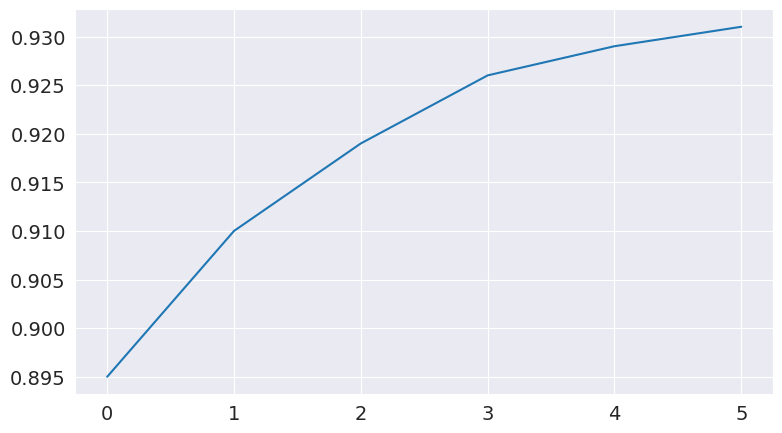

In [659]:
plt.plot(yield_apples)

Calling the plt.plot function draws the line chart as expected, and also returns a list of plots drawn [<matplotlib.lines.Line2D at 0x7ff70aa20760>] shwon within the output. We can include a semicolon(;) at the end of the last statement in the cell to avoid showing the output and just display the graph.

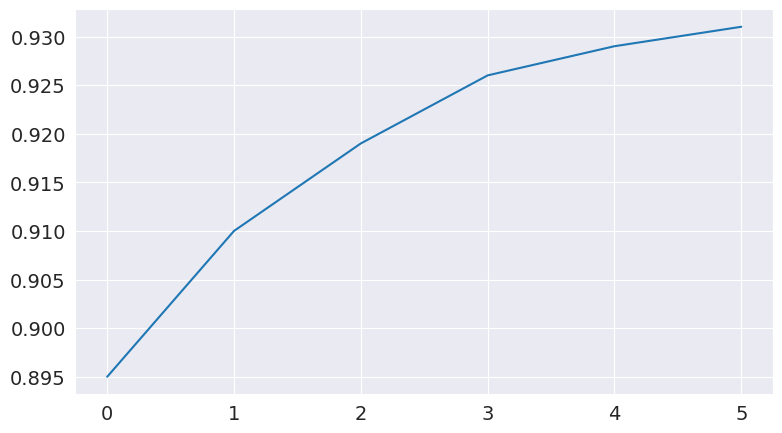

In [660]:
plt.plot(yield_apples);

Let's enhance this plot step-by-step to make it more informative and beautiful.

## Customizing the X-axis

The x-axis of the plot currently shows list element indexes 0 to 5. The plot would be more informative if we could show the year for which the data is being plotted. We can do this by two arguments plt.plot.

In [661]:
years = [2010, 2011, 2012, 2013, 2014, 2015]
yield_apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931]

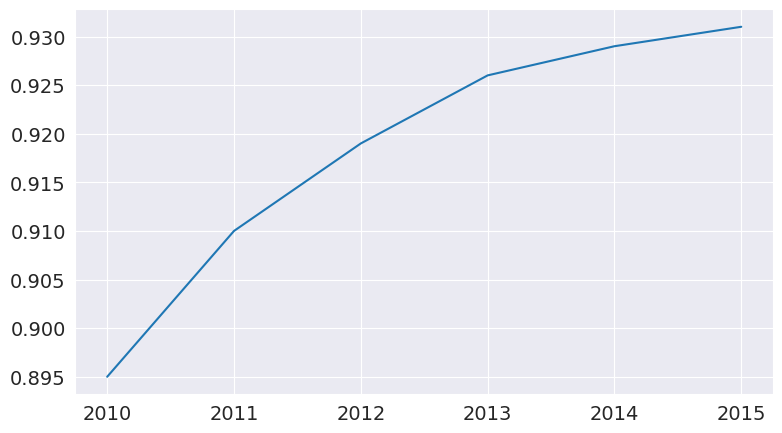

In [662]:
plt.plot(years, yield_apples)

## Axis Labels

We can add labels to the axis to show what each axis represnts using the plt.xlabel and plt.ylabel methods.

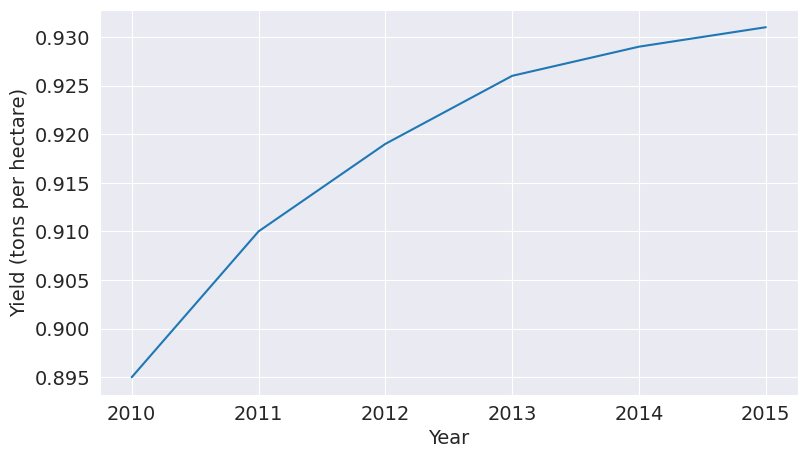

In [663]:
plt.plot(years, yield_apples)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)');

## Plotting Multiple Lines

It's really easy to plot multiple lines in the same graph. Just invoke the plt.plot function multiple times. Let's compare the yields of apples vs oranges in Kanto.

In [664]:
years = range(2000, 2012)
apples = [0.895, 0.91, 0.919, 0.926, 0.929, 0.931, 0.934, 0.936, 0.937, 0.9375, 0.9372, 0.939]
oranges = [0.962, 0.941, 0.930, 0.923, 0.918, 0.908, 0.907, 0.904, 0.901, 0.898, 0.9, 0.896]

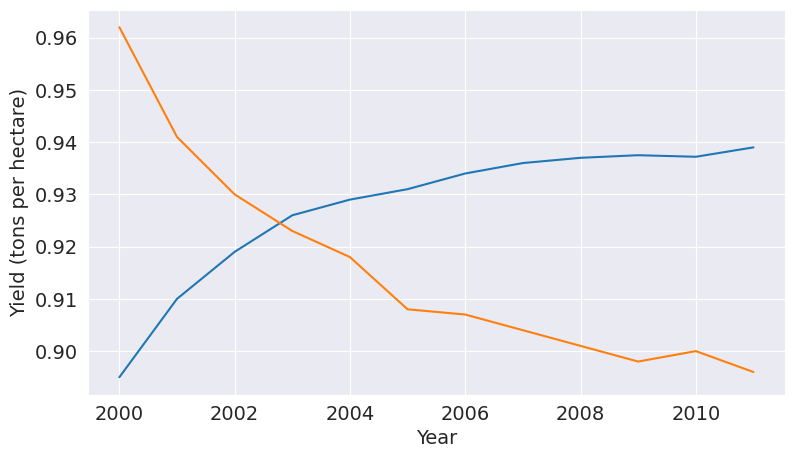

In [665]:
plt.plot(years, apples)
plt.plot(years, oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)');

## Chart Title and Legend

To differentiate between multiple lines, we can include a legend within the graph using the plt.legend function. We also give the entire chart a title using the plt.title function.

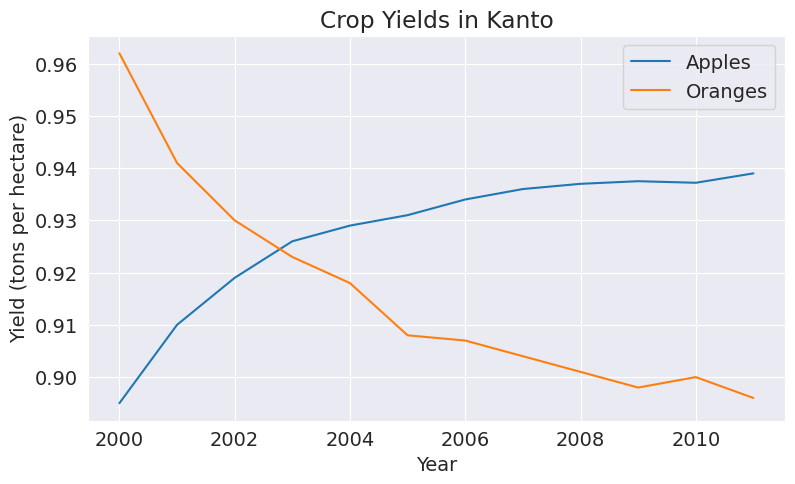

In [666]:
plt.plot(years, apples)
plt.plot(years, oranges)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges']);

## Line Markers

We can also show markers for the data points on each line using the marker argument of plt.plot. Matplotlib supports many different types of markers like circle, cross, square, diamond e.t.c. You can find the full list of marker types here:

[https://matplotlib.org/3.1.1/api/markers_api.html](https://matplotlib.org/3.1.1/api/markers_api.html)

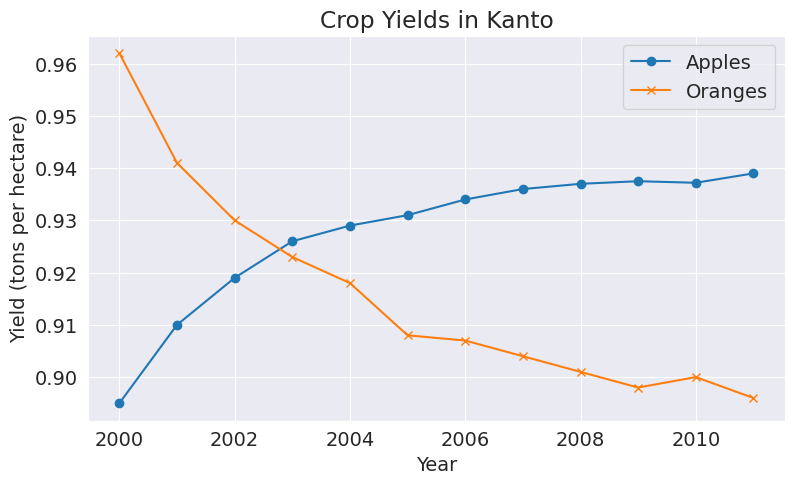

In [667]:
plt.plot(years, apples, marker='o')
plt.plot(years, oranges, marker='x')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges']);

## Styling lines and markers

The plt.plot function supports many arguments for styling lines and markers:

* color or c: Set the color of the line [supported colors]()
* linestyle or ls: Choose between a solid or dashed line
* linewidth or lw: Set the width of a line
* markersize or ms: Set the size of markers
* markeredgecolor or mec: Set the edge color for markers
* markeredgewidth or mew: Set the edge width for markers
* markerfacecolor or mfc: Set the fill color for markers
* alpha: Opacity of the plot

Check out the documentation for plt.plot to learn more:

[https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

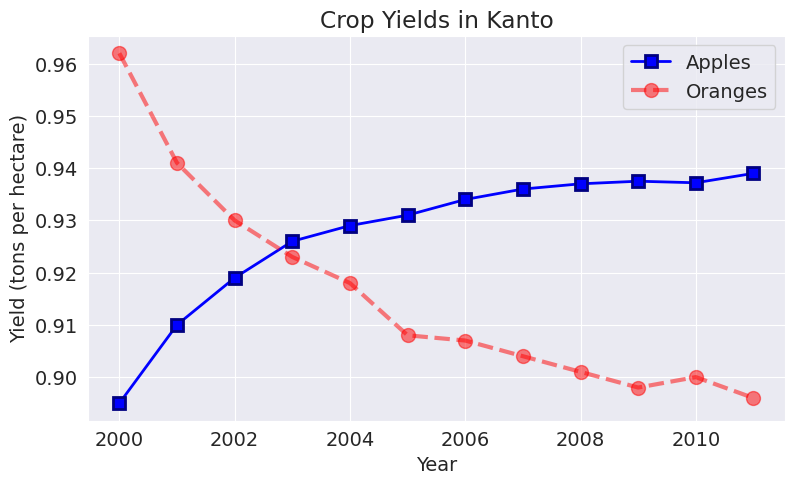

In [668]:
plt.plot(years, apples, marker = 's', c = 'b', ls = '-', lw = 2, ms = 8, mew = 2, mec = 'navy')
plt.plot(years, oranges, marker = 'o', c = 'r', ls = '--', lw = 3, ms = 10, alpha = .5)
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges']);

The fmt argument provides a shorthand for specifying the line style, marker and line color. It can be provided as the third argument to plt.plot.

    fmt = '[marker][line][color]'

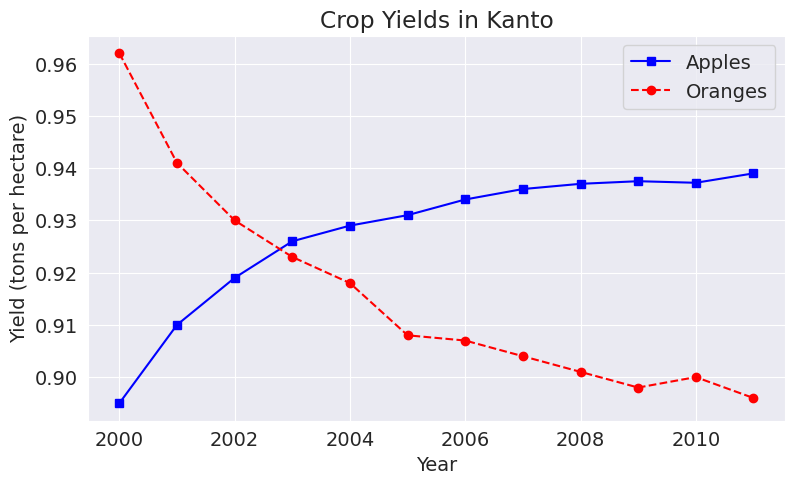

In [669]:
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges']);

If no line style is specified in fmt, only markers are drawn.

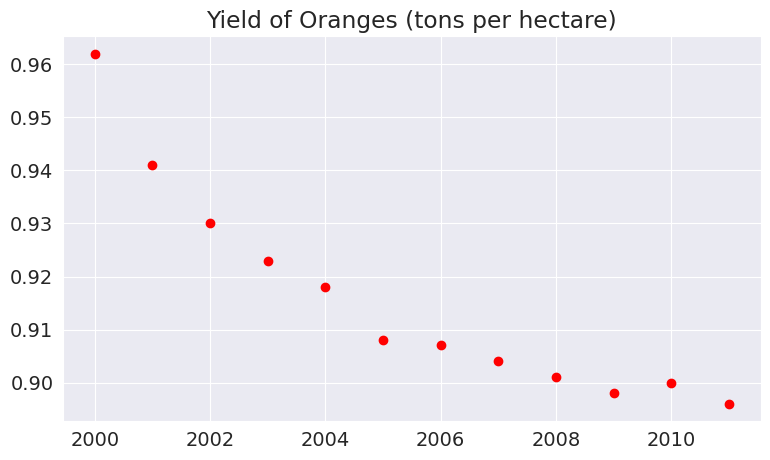

In [670]:
plt.plot(years, oranges, 'or')
plt.title('Yield of Oranges (tons per hectare)');

## Changing the Figure Size

You acn use the plt.figure function to change the size of the figure.

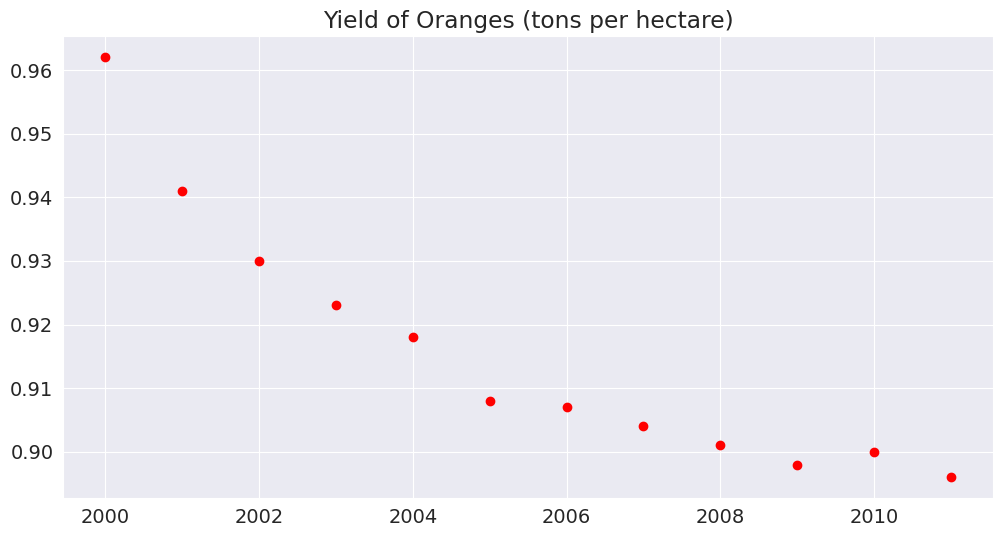

In [671]:
plt.figure(figsize=(12, 6))

plt.plot(years, oranges, 'or')
plt.title('Yield of Oranges (tons per hectare)');

## Improving Default Styles using Seaborn

An easy way to make your charts look beautiful is to use some default styles provided in the Seaborn library. These can be applied globally using the sns.set_style function. You can see a full list of predefined styles here: [https://seaborn.pydata.org/generated/seaborn.set_style.html](https://seaborn.pydata.org/generated/seaborn.set_style.html)

In [672]:
sns.set_style('whitegrid')

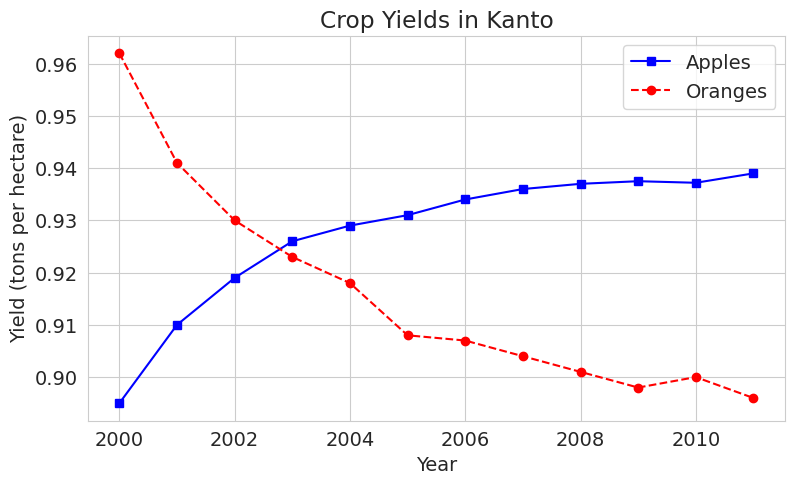

In [673]:
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges']);

In [674]:
sns.set_style('darkgrid')

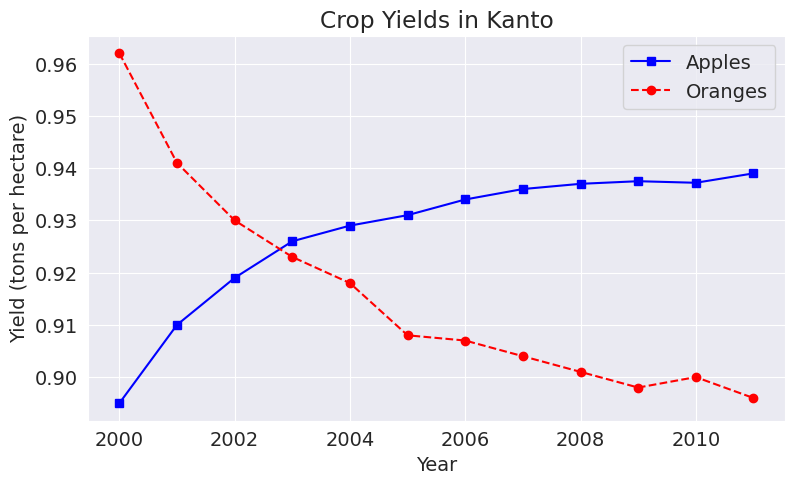

In [675]:
plt.plot(years, apples, 's-b')
plt.plot(years, oranges, 'o--r')
plt.xlabel('Year')
plt.ylabel('Yield (tons per hectare)')
plt.title('Crop Yields in Kanto')
plt.legend(['Apples', 'Oranges']);

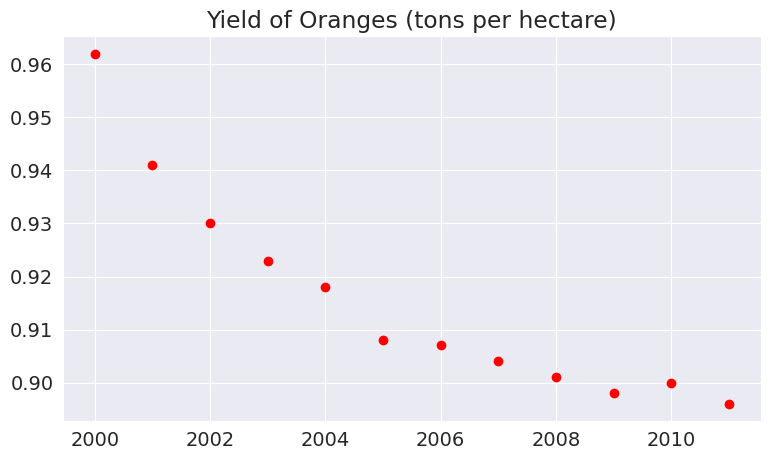

In [676]:
plt.plot(years, oranges, 'or')
plt.title('Yield of Oranges (tons per hectare)');

You can also edit default styles directly by modifying the matplotlib.rcParams dictionary.

Learn more: [https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html#matplotlib-rcparams](https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html#matplotlib-rcparams)

In [677]:
import matplotlib

In [678]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

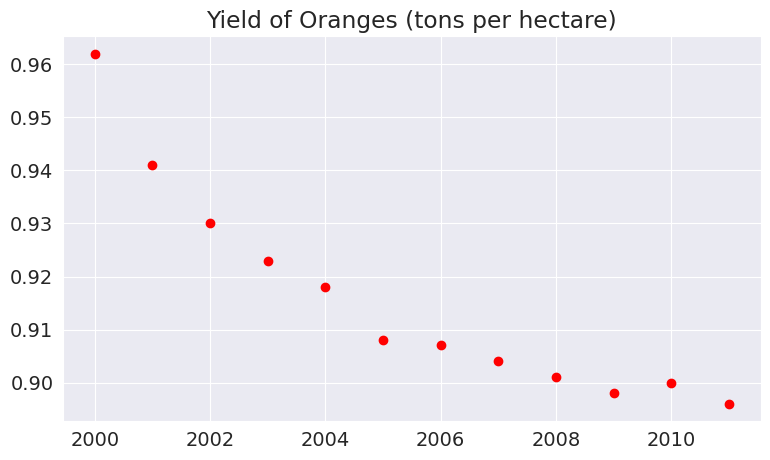

In [679]:
plt.plot(years, oranges, 'or')
plt.title('Yield of Oranges (tons per hectare)');

## Scatter Plot

In a scatter plot, the values of 2 variables are plotted as points on a 2-dimensional grid. Additionally, you can also use a third variable to determine the size or color of the points. Let's try out an example.

The [Iris flower dataset]() provides samples measurements of sepals and petals for 3 species of flowers. The Iris dataset is included with the Seaborn library, and can be loaded as a Pandas data frame.

In [680]:
# Load data into a Pandas dataframe
flowers_df = sns.load_dataset('iris')

In [681]:
flowers_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [682]:
flowers_df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Let's try to visualize the relationship between sepal length and sepal width. Our first instict might be to create a line chart using plt.plot. However, the output is not very informative as there are too many combinations of the two properties within the dataset, and there doesn't seem to be simple relationship between them.

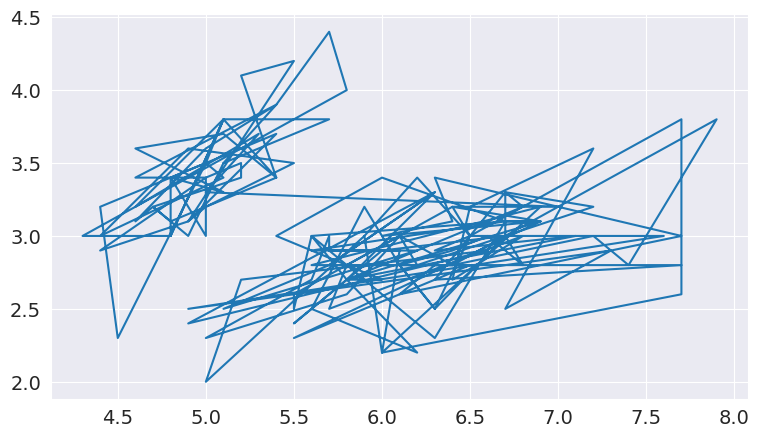

In [683]:
plt.plot(flowers_df.sepal_length, flowers_df.sepal_width);

We can use a scatter plot to visualize how sepal length and sepal width vary using the scatterplot function from seaborn (imported as sns).

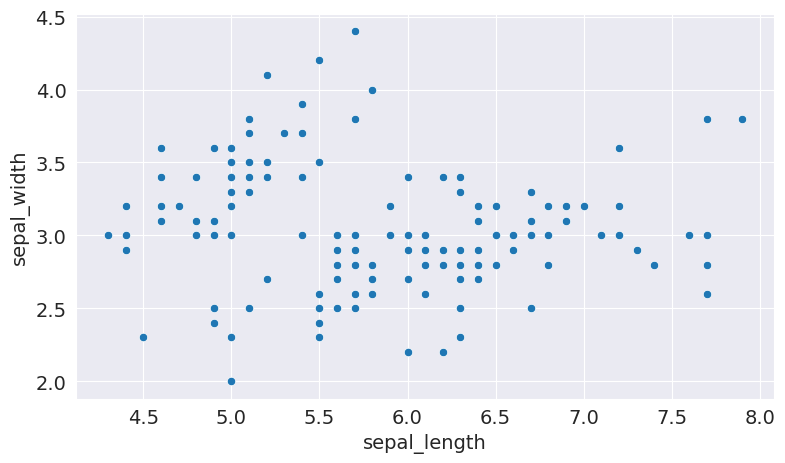

In [684]:
sns.scatterplot(x=flowers_df.sepal_length, y=flowers_df.sepal_width);

## Adding Hues

Notice how the points in the above plot seem to form distinct clusters with some outliers. We can color the dots using the flower species as a hue. We can also make the points larger using the s argument.

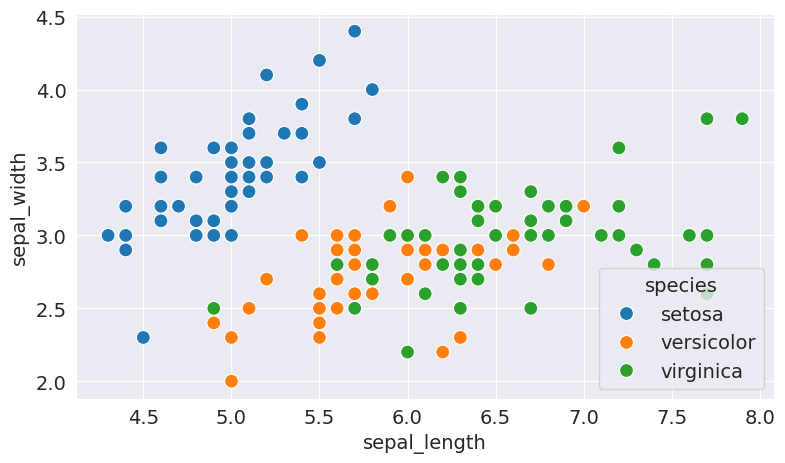

In [685]:
sns.scatterplot(x=flowers_df.sepal_length,
                y=flowers_df.sepal_width,
                hue=flowers_df.species, s=100);

Adding hues makes the plot more informative. We can immediately tell that flowers of the Setosa species have a smaller sepal length but higher sepal widths, while the opposite holds true for the Virginica species.

## Customizing Seaborn Figures

Since Seaborn uses Matplotlib's plotting functions internally, we can use functions like plt.figure and plt.title to modify the figure.

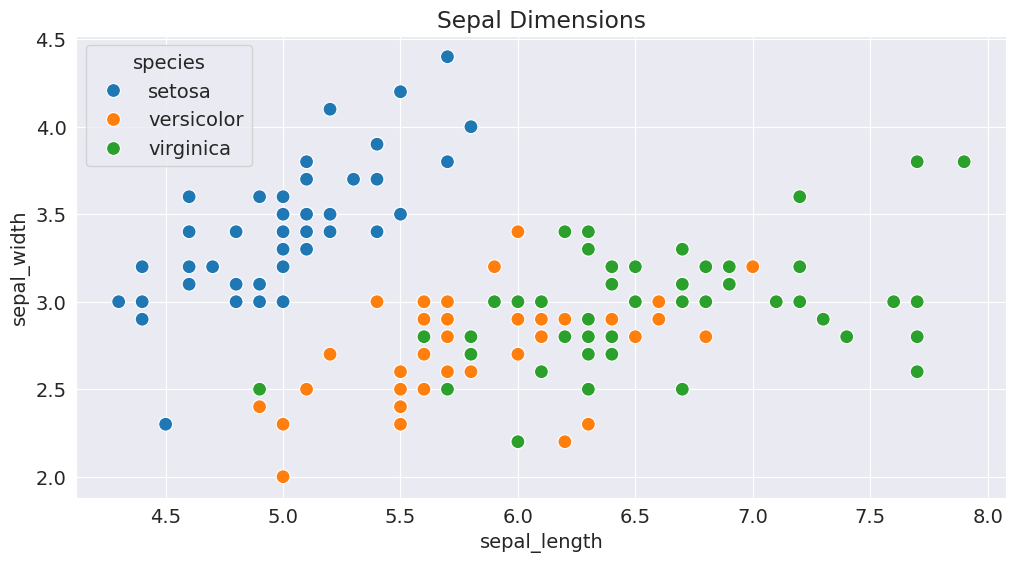

In [686]:
plt.figure(figsize = (12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x = flowers_df.sepal_length,
                y = flowers_df.sepal_width,
                hue = flowers_df.species,
                s = 100);

## Plotting using Pandas Data Frames

Seaborn has in-built support for Pandas data frames. Instead of passing each column as a series, you can also pass column names and use the data argument to pass the data frame.

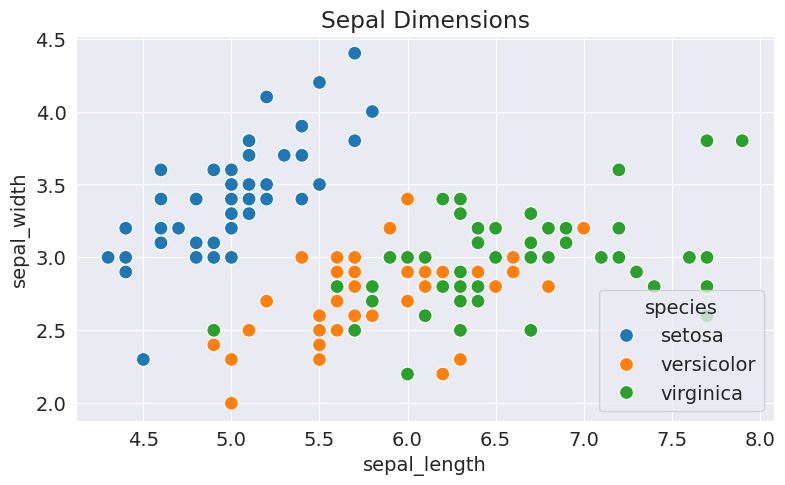

In [687]:
plt.title('Sepal Dimensions')

sns.scatterplot(x = 'sepal_length',
                y = 'sepal_width',
                hue = 'species',
                s = 100,
                data = flowers_df);

## Histogram

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

As an example, let's visualize how the values of sepal width in the flowers dataset are distributed. We can use the plt.hist function to create a histogram.

In [688]:
# Load data into a Pandas dataframe
flowers_df = sns.load_dataset('iris')

In [689]:
flowers_df.sepal_width

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


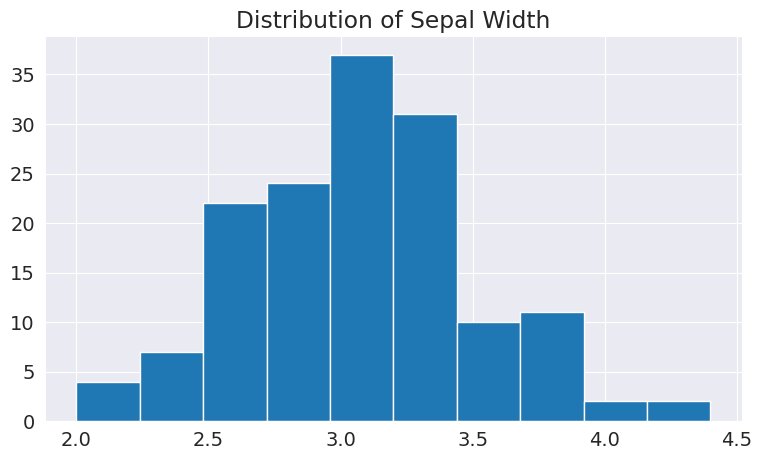

In [690]:
plt.title("Distribution of Sepal Width")
plt.hist(flowers_df.sepal_width);

We can immediately see that values of sepal width fall in the range 2.0 - 4.5, and around 35 values are in the range 2.9 - 3.1, which seems to be the largest bin.

## Controlling the size and number of bins

We can control the number of bins, or the size of each bin using the bins argument.

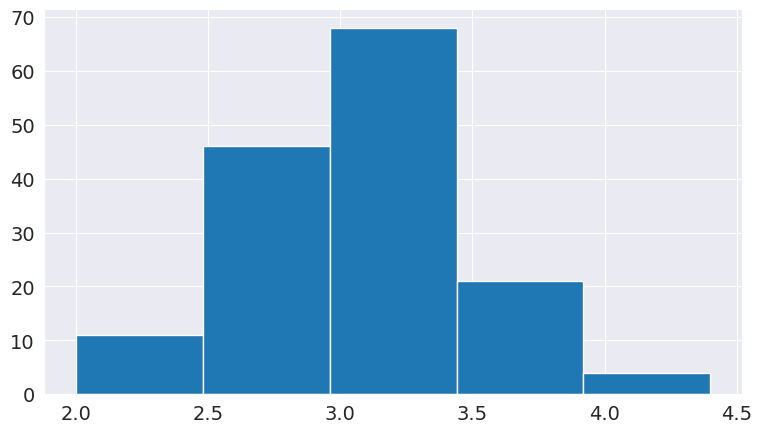

In [691]:
# Specifying the number of bins
plt.hist(flowers_df.sepal_width, bins=5);

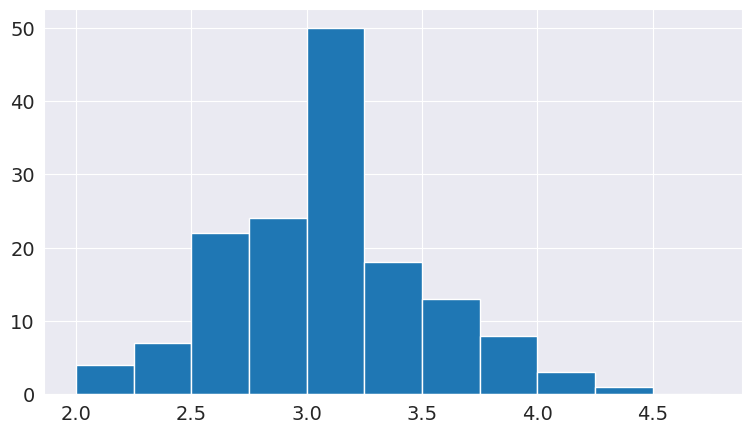

In [692]:
import numpy as np

# Specifying the boundaries of each bin
plt.hist(flowers_df.sepal_width, bins=np.arange(2, 5, 0.25));

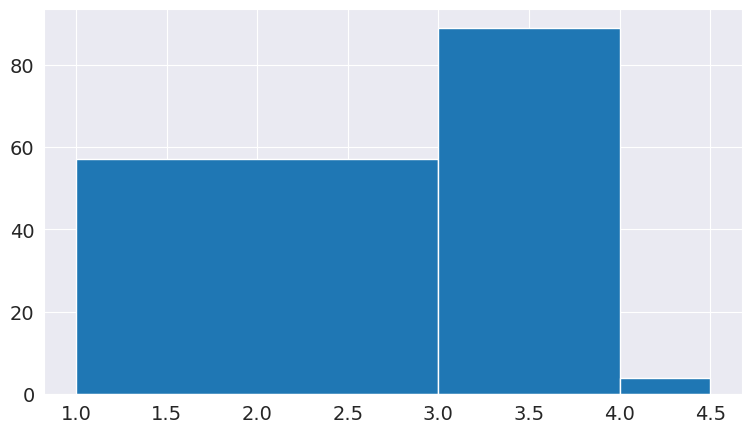

In [693]:
# Bins of unequal sizes
plt.hist(flowers_df.sepal_width, bins=[1, 3, 4, 4.5]);

## Multiple Histograms

Similar to line charts, we can draw multiple histograms in a single chart. We can reduce the opacity of each histogram, so that the bars of one histogram don't hide the bars for others.

Let's draw separate histograms for each species flowers.

In [694]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

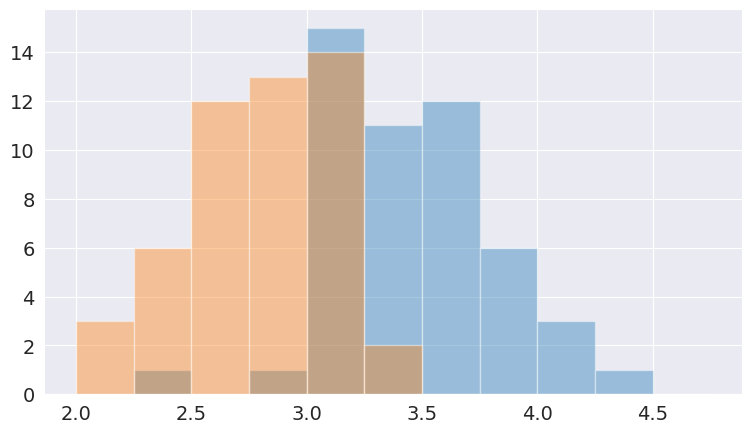

In [695]:
plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));

We can also stack multiple histograms on top of one another.

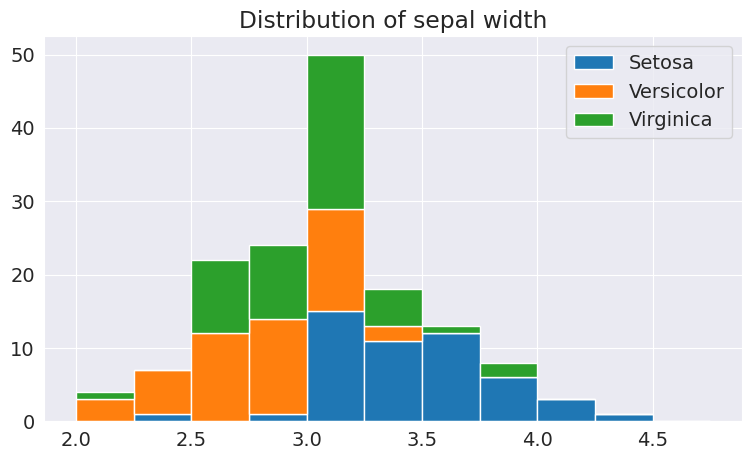

In [696]:
plt.title("Distribution of sepal width")
plt.hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width],
         bins = np.arange(2, 5, 0.25),
         stacked = True)

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

## Bar Chart

Bar charts are quite similar to line charts i.e. they show a sequence of values, however a bar is shown for each value, rather than points connected by lines. We can use the plt.bar function to draw a bar chart.

In [697]:
years = range(2000, 2006)
apples = [0.35, 0.6, 0.9, 0.8, 0.65, 0.8]
oranges = [0.4, 0.8, 0.9, 0.7, 0.6, 0.8]

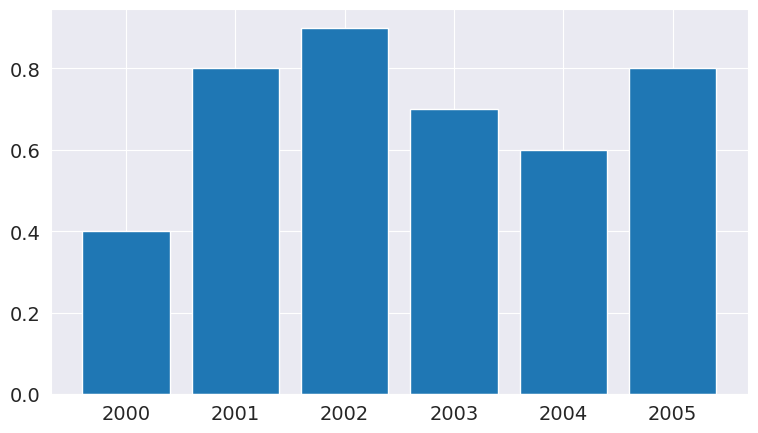

In [698]:
plt.bar(years, oranges);

Like Histograms, bars can also be stacked on top of one another. We can use the bottom argument to plt.bar to achieve this.

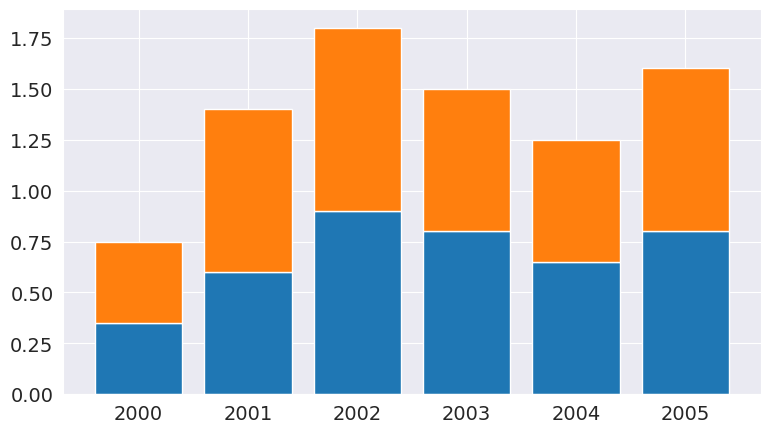

In [699]:
plt.bar(years, apples)
plt.bar(years, oranges, bottom=apples);

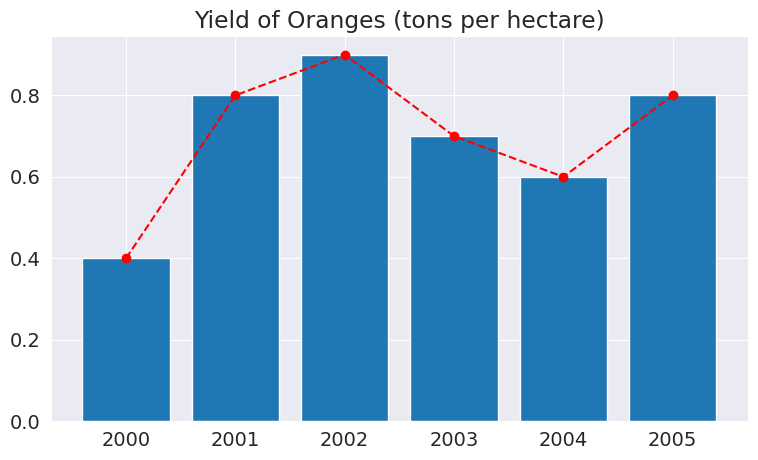

In [700]:
plt.bar(years, oranges);
plt.plot(years, oranges, 'o--r');
plt.title('Yield of Oranges (tons per hectare)');

## Bar Plots with Averages

Let's look at another sample dataset included with Seaborn, called "tips". The dataset contains information about the sex, time of day, total bill and amount of customers visting a restaurant over a week.

In [701]:
tips_df = sns.load_dataset('tips');

In [702]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


We might want to draw a bar chart to visualize how the average bill amount varies across different days of the week. One way to do this would be to compute the day-wise averages and the use plt.bar(try it as exercise).

However, since this is a very common use case, the Seaborn library provides a barplot function which can automatically compute averages.

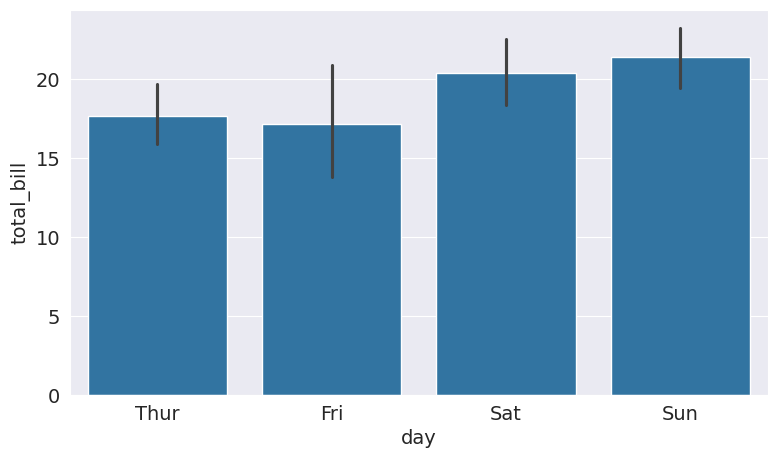

In [703]:
sns.barplot(x = 'day', y = 'total_bill', data = tips_df);

In [704]:
bills_average_df = tips_df.groupby('day')[['total_bill']].mean()
bills_average_df

<ipython-input-704-13e9a47f4ca6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bills_average_df = tips_df.groupby('day')[['total_bill']].mean()


,total_bill
day,
Thur,17.682742
Fri,17.151579
Sat,20.441379
Sun,21.410000


The lines cutting each bar represent the amount of variation in the values. For instance, it seems like the variation in the total bill was quite high on Fridays, and lower on Saturday.

We can also specify a hue argument to compare bar plots side-by-side based on a third feature e.g. sex.

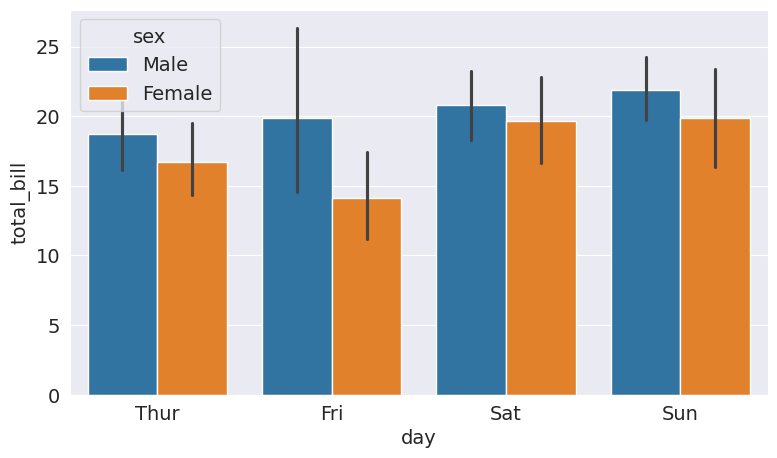

In [705]:
sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips_df);

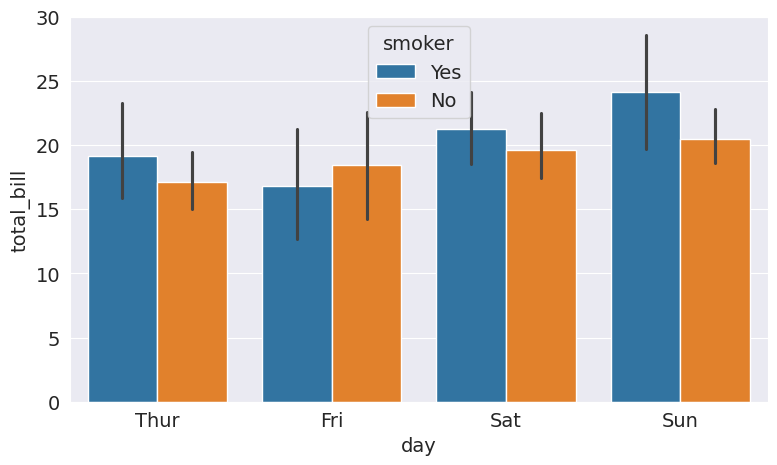

In [706]:
sns.barplot(x = 'day', y = 'total_bill', hue = 'smoker', data = tips_df);

You can make the bars horizontal simply by switching the axis.

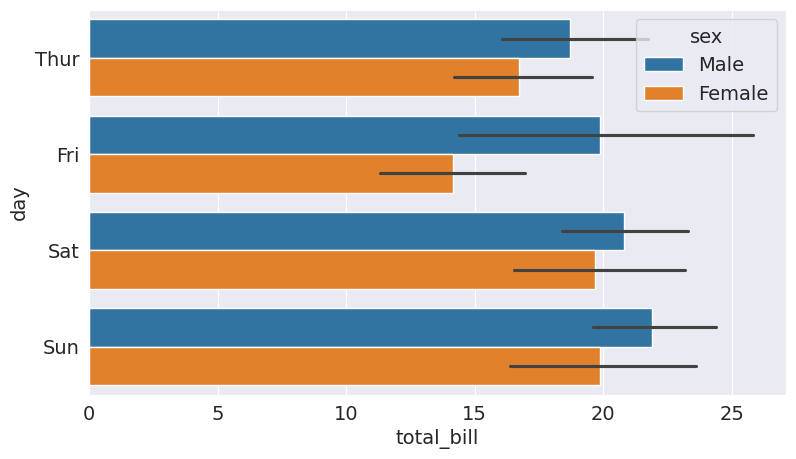

In [707]:
sns.barplot(x = 'total_bill', y = 'day', hue = 'sex', data = tips_df);

## Heatmap

A heatmap is used to visualize 2-dimensional data like a matrix or a table using colors. The best way to understand it is by looking at an example. We'll use another sample dataset from Seaborn, called "flights", to visualize monthly passenger footfall at an airport over 12 years.

In [708]:
df = sns.load_dataset('flights')

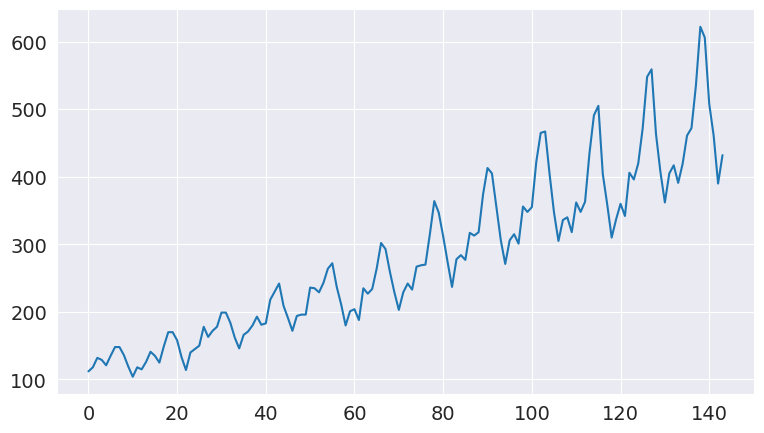

In [709]:
plt.plot(df.passengers);

In [710]:
flights_df = sns.load_dataset('flights').pivot_table(index='month', columns='year', values='passengers')

In [711]:
flights_df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


flights_df is a matrix with one row for each month and one column of each year. The values in the matrix show the number of passengers(in thousands) taht visited the airport in a specific month of a specific year. We can use the sns.heatmap function to visualize the footfall at the airport.

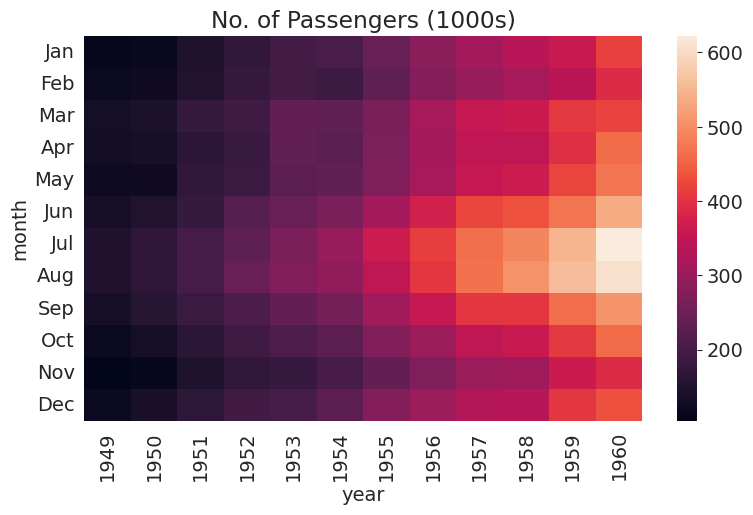

In [712]:
plt.title('No. of Passengers (1000s)')
sns.heatmap(flights_df);

The brighter colors indicate a higher footfall at the airport. By looking at the graph, we can infer two things:

* The footfall at the airport in any given year tends to be the highest around July & August.
* The footfall at the airport in any given month tends to grow year by year.

We can also display the actual values in each block by specifying annot=True, and use the cmap argument to change the color palette.

<Axes: title={'center': 'No. of Passengers (1000s)'}, xlabel='year', ylabel='month'>

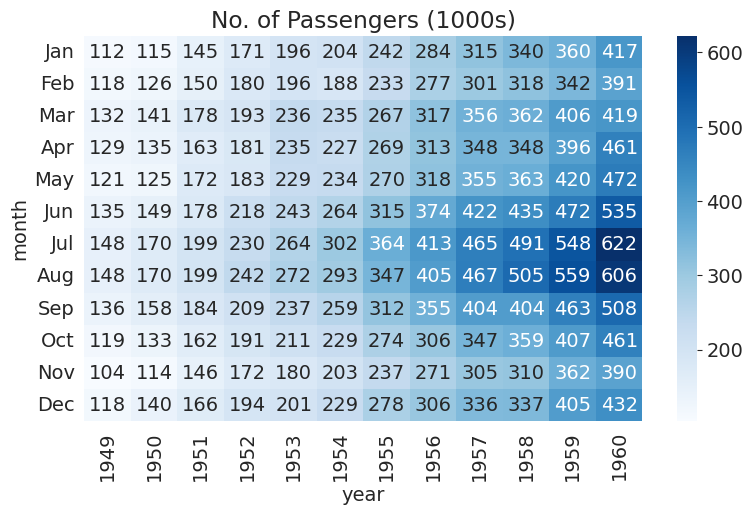

In [713]:
plt.title('No. of Passengers (1000s)')
sns.heatmap(flights_df, fmt='.0f', annot=True, cmap='Blues')

## Images

Matplotlib can also be used to display images. Let's download an image from the internet.

In [714]:
from urllib.request import urlretrieve

In [715]:
#urlretrieve('https://i.imgur.com/SkPbq.jpg', 'chart.jpg');

Before an image can be displayed, it has to be read into memory using the PIL module

In [716]:
from PIL import Image

In [717]:
#img = Image.open('chart.jpg')

An image loaded using PIL is simply a 3-dimensional numpy array containing pixel intensities for red, green & blue(RGB) channels of the image. We can convert the image into an array using np.array

In [718]:
#img_array = np.array(img)

In [719]:
#img_array.shape

We can display the PIL image using plt.imshow.

In [720]:
#plt.imshow(img);

We can turn off the axis & grid lines, and show a title using the relevant functions.

In [721]:
'''plt.grid(False)
plt.title('A data science meme')
plt.axis('off')
plt.imshow(img);'''

"plt.grid(False)\nplt.title('A data science meme')\nplt.axis('off')\nplt.imshow(img);"

To display a part of the image, we can simply select a slice from the numpy araray.

In [722]:
'''plt.grid(False)
plt.axis('off')
plt.imshow(img_array[125:325, 105:305]);'''

"plt.grid(False)\nplt.axis('off')\nplt.imshow(img_array[125:325, 105:305]);"

## Plotting multiple charts in a grid

Matplotlib and Seaborn also support plotting multiple charts in a grid, using plt.subplots, which returns a set of axis that can be used for plotting.

Here's a single grid showing the different types of charts we've covered in this tutorial.

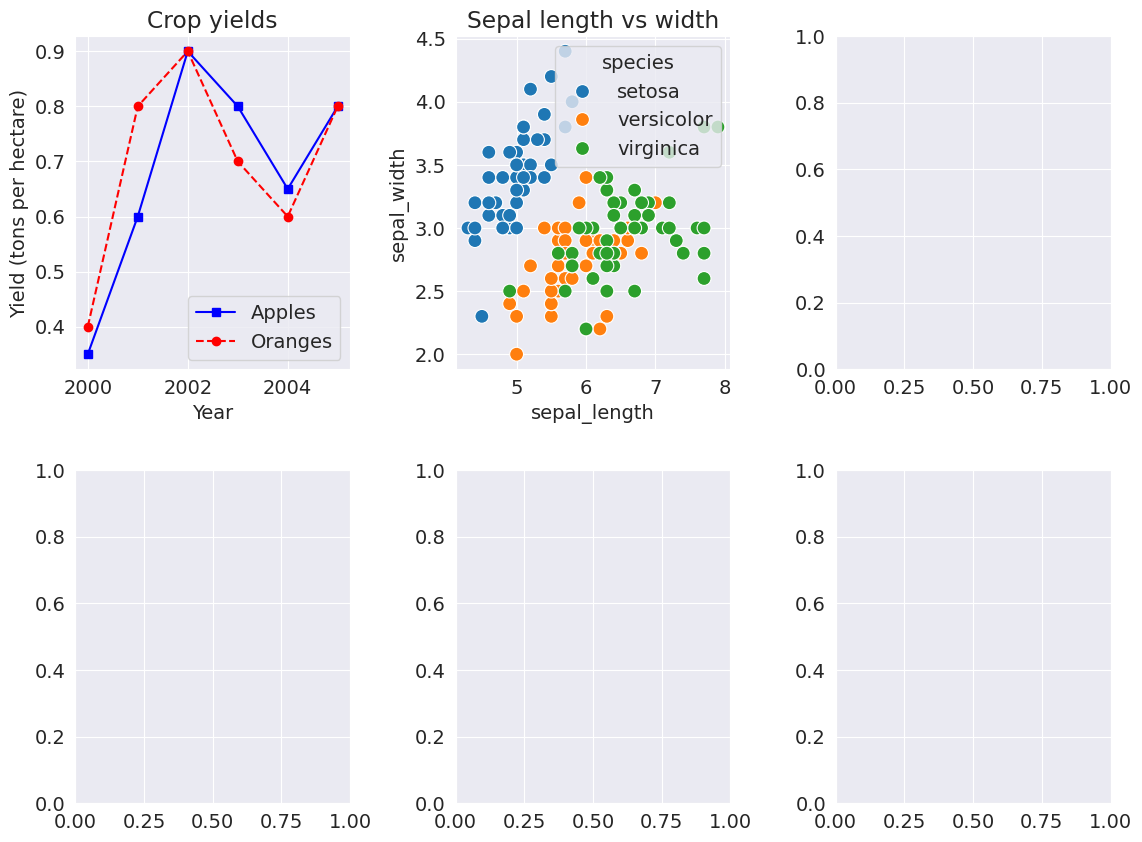

In [723]:
fig, axes = plt.subplots(2, 3, figsize=(12, 9))
axes[0, 0].plot(years, apples, 's-b')
axes[0, 0].plot(years, oranges, 'o--r')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Yield (tons per hectare)')
axes[0, 0].set_title('Crop yields')
axes[0, 0].legend(['Apples', 'Oranges'])

axes[0,1].set_title('Sepal length vs width')
sns.scatterplot(x = flowers_df.sepal_length,
                y = flowers_df.sepal_width,
                hue = flowers_df.species,
                s = 100,
                ax = axes[0, 1])
plt.tight_layout(pad = 2)

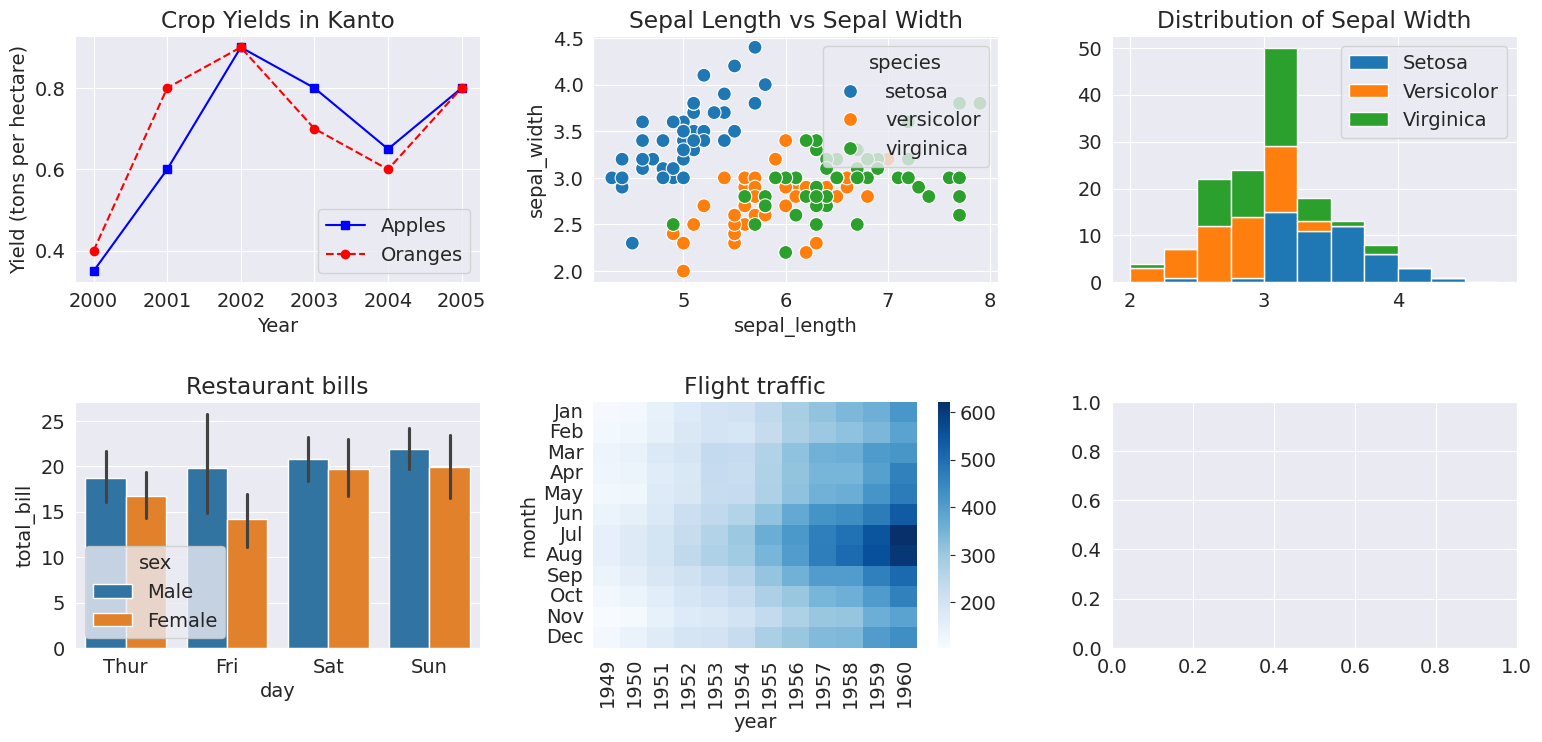

In [724]:
fig, axes = plt.subplots(2, 3, figsize = (16, 8))

# Use the axes for plotting
axes[0, 0].plot(years, apples, 's-b')
axes[0, 0].plot(years, oranges, 'o--r')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Yield (tons per hectare)')
axes[0, 0].legend(['Apples', 'Oranges'])
axes[0, 0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
axes[0, 1].set_title('Sepal Length vs Sepal Width')
sns.scatterplot(x = flowers_df.sepal_length,
                y = flowers_df.sepal_width,
                hue = flowers_df.species,
                s= 100,
                ax= axes[0, 1]);

# Use the axes for plotting
axes[0, 2].set_title('Distribution of Sepal Width')
axes[0, 2].hist([setosa_df.sepal_width, versicolor_df.sepal_width, virginica_df.sepal_width],
                bins = np.arange(2, 5, 0.25), # Changed arrange to arange
                stacked = True);

axes[0, 2].legend(['Setosa', 'Versicolor', 'Virginica']);

#Pass the axes into Seaborn
axes[1, 0].set_title('Restaurant bills')
sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips_df, ax = axes[1, 0]);

# Pass the axes into Seaborn
axes[1, 1].set_title('Flight traffic')
sns.heatmap(flights_df, cmap = 'Blues', ax = axes[1, 1]);

# Plot an image using the axes
'''axes[1, 2].set_title('Data Science Meme')
axes[1, 2].imshow(img)
axes[1, 2].grid(False)
axes[1, 2].set_xticks([])
axes[1, 2].set_yticks([])'''

plt.tight_layout(pad = 2);

See this page for a full list of supported functions:
[https://matplotlib.org/3.3.1/api/axes_api.html#the-axes-class](https://matplotlib.org/3.3.1/api/axes_api.html#the-axes-class)

## Pair plots with Seaborn

Seaborn also provides a helper function sns.pairplot to automatically plot different types of charts pairs of features within a dataframe.

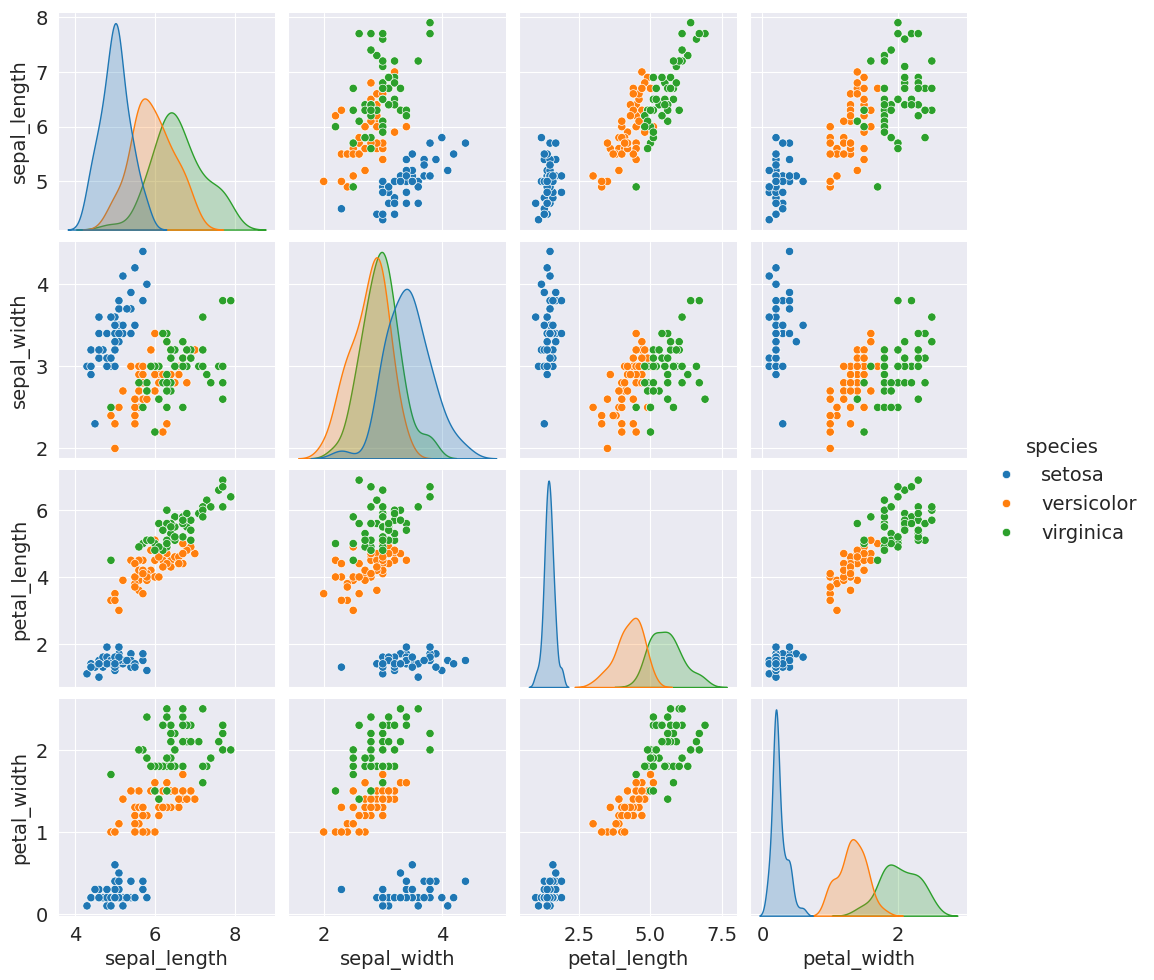

In [725]:
sns.pairplot(flowers_df, hue = 'species');

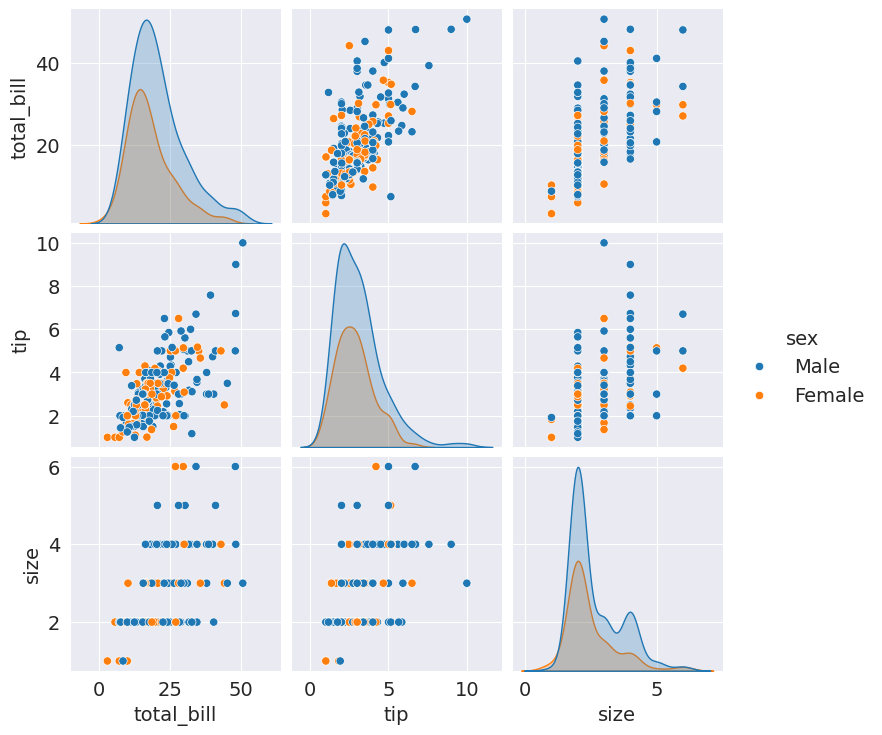

In [726]:
sns.pairplot(tips_df, hue = 'sex');

Where to find datasets to use for projects.

1. Kaggle datasets
2. Uci machine learning datasets
3. Awesome public datasets
4. Google dataset search

# Exploratory Data Analysis - A Case Study

## Opendatasets

A curated collectionof datasets for data analysis & machine learning, downloadable with a single Python command.

**Installation and Usage**

Install the library using pip:

    pip install opendatasets --upgrade

To use the library, just import it and use the download function.

    import opendatasets as od
    od.download('stackoverflow-developer-survey-2020')

In [727]:
!pip install opendatasets --upgrade

In [728]:
import opendatasets as od

In [729]:
od.download('stackoverflow-developer-survey-2020')

Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_public.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/survey_results_schema.csv
Using downloaded and verified file: ./stackoverflow-developer-survey-2020/README.txt


In [730]:
import os

In [731]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_schema.csv', 'README.txt', 'survey_results_public.csv']

You can go through the downloaded files using File > Open menu option in Jupyter. It seems like the datasets contains 3 files:

* README.txt - Containing information about the dataset
* survey_results_schema.csv - Containing the list of questions(and short codes for each question)
* survey_results_public.csv - Contains the full list of responses to the questions

Let's load the CSV files using the Pandas library. We'll use the name survey_raw_df for the dataframe, to indicate that this is unprocessed data that which we might clean, filter and modify to prepare a data frame that's ready for analysis.

In [732]:
import pandas as pd

In [733]:
 survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [734]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions(although many questions are optional). The responses have been anonymized and there's no personal identifiable information available to us - although each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame.

In [735]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that short codes for questions are used as column names.

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: Column and QuestionText, so we can load it as Pandas series with column as the index and the QuestionText as the value.

In [736]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'

In [737]:
schema_raw = pd.read_csv(schema_fname, index_col = 'Column').QuestionText

In [738]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


We can now use schema_raw to retrieve the full question text for any column in survey_raw_df.

In [739]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We've now loaded the dataset, and we're ready to move on to the next step of preprocessing & cleaning the data for our analysis.

## Data Preparation and Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

* Demographics of the survey respondents & the global programming community.
* Distribution of programming skills, experience and preferences.
* Employment-related information, preferences & opinions

Let's select a subset of columns with the relevant data for our analysis.

In [740]:
selected_columns = [
    # Demographics
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
    # Programming experience
    'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro',
    'LanguageWorkedWith', 'LanguageDesireNextYear',
    'NEWLearn', 'NEWStuck',
    # Employment
    'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors',
    'NEWOvertime', 'NEWEdImpt'
]

In [741]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame survey_df, which we can continue to modify further without affecting the original data frame.

In [742]:
survey_df = survey_raw_df[selected_columns].copy()

In [743]:
schema = schema_raw[selected_columns]

Let's view some basic information about the dataframe.

In [744]:
survey_df.shape

(64461, 20)

In [745]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type object, either because they contain values of different types, or they contain empty values, which are represented using NaN. It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows(64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only two of the columns were detected as numeric columns (Age and WorkWeekHrs), even though there are a few other columns which have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types, while ignoring any non-numeric values(they will be converted to NaNs)

In [746]:
survey_df.Age1stCode

,Age1stCode
0,13
1,19
2,15
3,18
4,16
...,...
64456,16
64457,NaN
64458,NaN
64459,NaN


In [747]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [748]:
schema.YearsCode

'Including any education, how many years have you been coding in total?'

In [749]:
survey_df.YearsCode.unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [750]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

Let's now view some basic statistics about the numeric columns.

In [751]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and max value is 279. This is a common issue with surveys: Responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the value in the age column is higher than 100 years or lower than 10 years as invalid survey responses. This can be done using the .drop method.

In [752]:
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)

The same holds true for WorkWeekHrs. Let's ignore entries where the value for the column is higher than 140hours.(~20 hours per day).

In [753]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows picking multiple options, but to simplify our analysis, we'll remove values containing more than option.

In [754]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385
"Man;Non-binary, genderqueer, or gender non-conforming",121
"Woman;Non-binary, genderqueer, or gender non-conforming",92
Woman;Man,73
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",25


In [755]:
import numpy as np

In [756]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [757]:
survey_df['Gender'].value_counts()

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385


We've now cleaned up and prepared the data set for analysis, Let's take a look at sample of rows from the data frame.

In [758]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
38678,Romania,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,16.0,35.0,20.0,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,NaN,Critically important
19668,Australia,41.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A humanities discipline (such as literature, h...",Yes,6.0,30.0,21.0,HTML/CSS;JavaScript;Ruby;Scala,Ruby,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, embedded applic...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Somewhat important
45374,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,20.0,6.0,2.0,Python,Go;Python,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Very important
23147,India,21.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,10.0,11.0,4.0,Bash/Shell/PowerShell;C;C++;HTML/CSS;JavaScrip...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Somewhat important
41955,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,NaN,NaN
21086,Switzerland,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,14.0,11.0,HTML/CSS;Java;JavaScript;SQL;VBA,Go;HTML/CSS;Java;JavaScript;Python;R;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",41.0,Slightly satisfied,Industry that I’d be working in;Diversity of t...,Occasionally: 1-2 days per quarter but less th...,Very important
54427,India,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14.0,9.0,1.0,C;C#;C++;HTML/CSS;JavaScript;Python;SQL,C++;Go;JavaScript;Python;R;Scala;SQL,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end",45.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Fairly important
11008,United Kingdom,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,12.0,5.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Haskel...,Bash/Shell/PowerShell;C#;C++;Haskell;HTML/CSS;...,Every few months,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,"Developer, full-stack",35.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Fairly important
36953,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,NaN,NaN,NaN,Java;Kotlin,Kotlin,Once every few years,Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
55660,India,21.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,4.0,NaN,C;C++;HTML/CSS;Java;JavaScript;Julia;Objective...,C;C++;HTML/CSS;Java;JavaScript;Julia;Kotlin;Ob...,Once a year,Meditate;Play games;Call a coworker or friend;...,Student,NaN,NaN,NaN,Diversit

## Exploratory Analysis and Visualization

Before we can ask interesting questions about the survey responses, it would help to understand what the demographics i.e. country, age, gender, education level, employment level e.t.c of the respondents look like. It's important to explore these variables in order to understand how representative the survey is of the worldwide programming community, as a survey of this scale generally tends to have some selection bias.

Let's begin by importing matplotlib.pyplot and seaborn.

In [759]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Country

Let's look at the number of countries from which there are responses in the survey, and plot the 10 countries the highest number of responses.

In [760]:
schema.Country

'Where do you live?'

In [761]:
survey_df.Country.nunique()

183

We can identify the country with the highest number of respondents using the value_counts method.

In [762]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

,count
Country,
United States,12371
India,8364
United Kingdom,3881
Germany,3864
Canada,2175
France,1884
Brazil,1804
Netherlands,1332
Poland,1259


We can visualize this information using a bar chart.

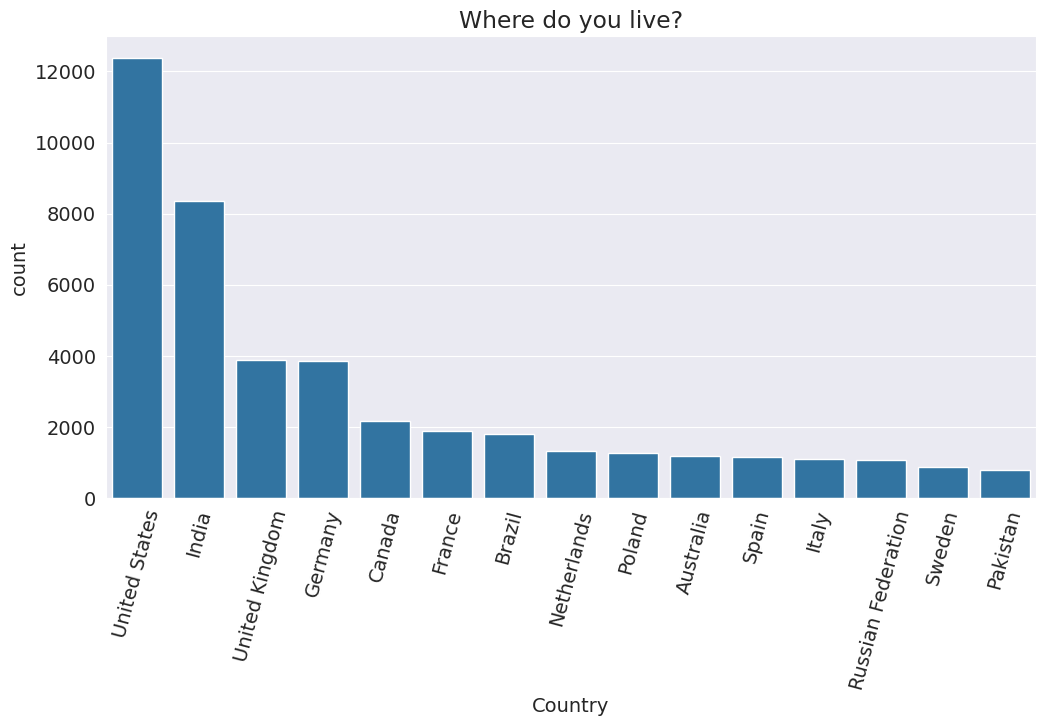

In [763]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(x = top_countries.index, y = top_countries);

It appears that a disproportionately high number of respondents are from USA & India - which one might expect since these countries have the highest populations(apart from china), and since the Survey is in English, which is the common language used by professionals in US, India & UK. We can already see that the survey may not be representative of the entire programming community - especially from non-English speaking countries.

**Exercise**: Try finding the percentage of responses from English-speaking vs. non-English speaking countries.

**Age**

The distribution of the age of the respondents is another important factor to look at, and we can use a histogram to visualize it.

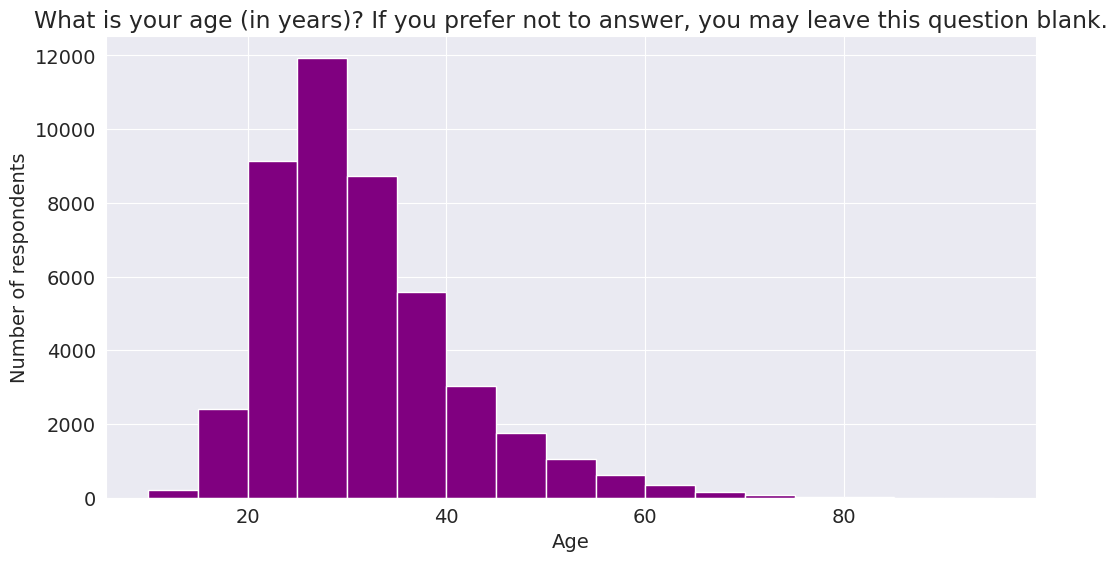

In [764]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins = np.arange(10, 100, 5), color = 'purple');

It appears that a large percentage of respondents are in the age range of 20-45, which is somewhat representative of the programming community in general, as a lot of young people have taken up computer as their field of study or profession in the last 20 years.

**Exercise**: You may want to filter out responses by age(or age group), if you'd like to analyze and compare the results of the survey for different age groups. Create a new column called AgeGroup which contains values like Less than 10 years, 10-18 years, 18-30 years, 30-45 years, 45-60 years, Older than 60 years, and repeat the analysis in the rest of this notebook for each age group.

**Gender**

Let's look at the distribution of responses for the Gender. It's a well known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [765]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [766]:
gender_counts = survey_df.Gender.value_counts(dropna = True)
gender_counts

,count
Gender,
Man,45895
Woman,3835
"Non-binary, genderqueer, or gender non-conforming",385


A pie chart would be a good way to visualize the distribution.

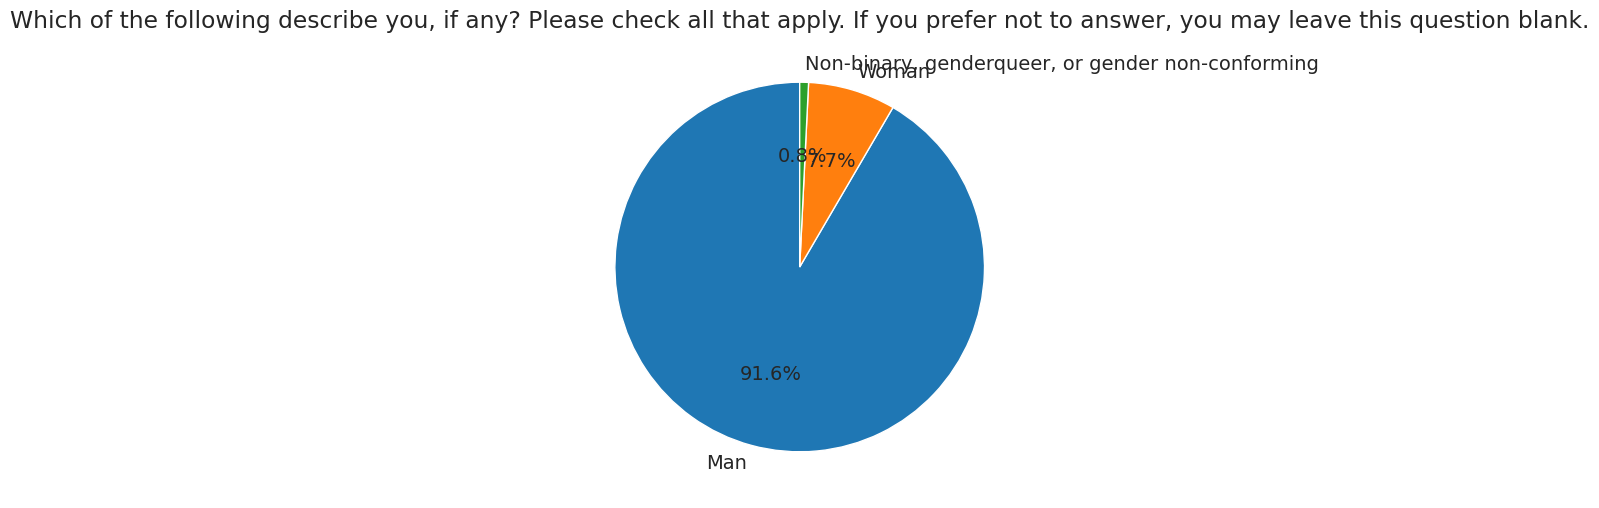

In [767]:
plt.figure(figsize=(12, 6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle=90);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community- which is estimated to be around 12%.

**Exercise**: It would be interesting to compare the survey responses & preferences across genders, and you're encouraged to repeat this analysis with these breakdowns. How do the relative education levels differ across genders? How to salaries differ? You may find this analysis on the Gender Divide in Data Science useful.

## Education

Fornal education in computer science is often considered an important requirement of becoming a programmer. Let's see if this indeed the case, especially since there are many free resources & tutorials available online to learn programming. We'll use a horizontal bar plot to compare education levels of respondents.

In [768]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [769]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

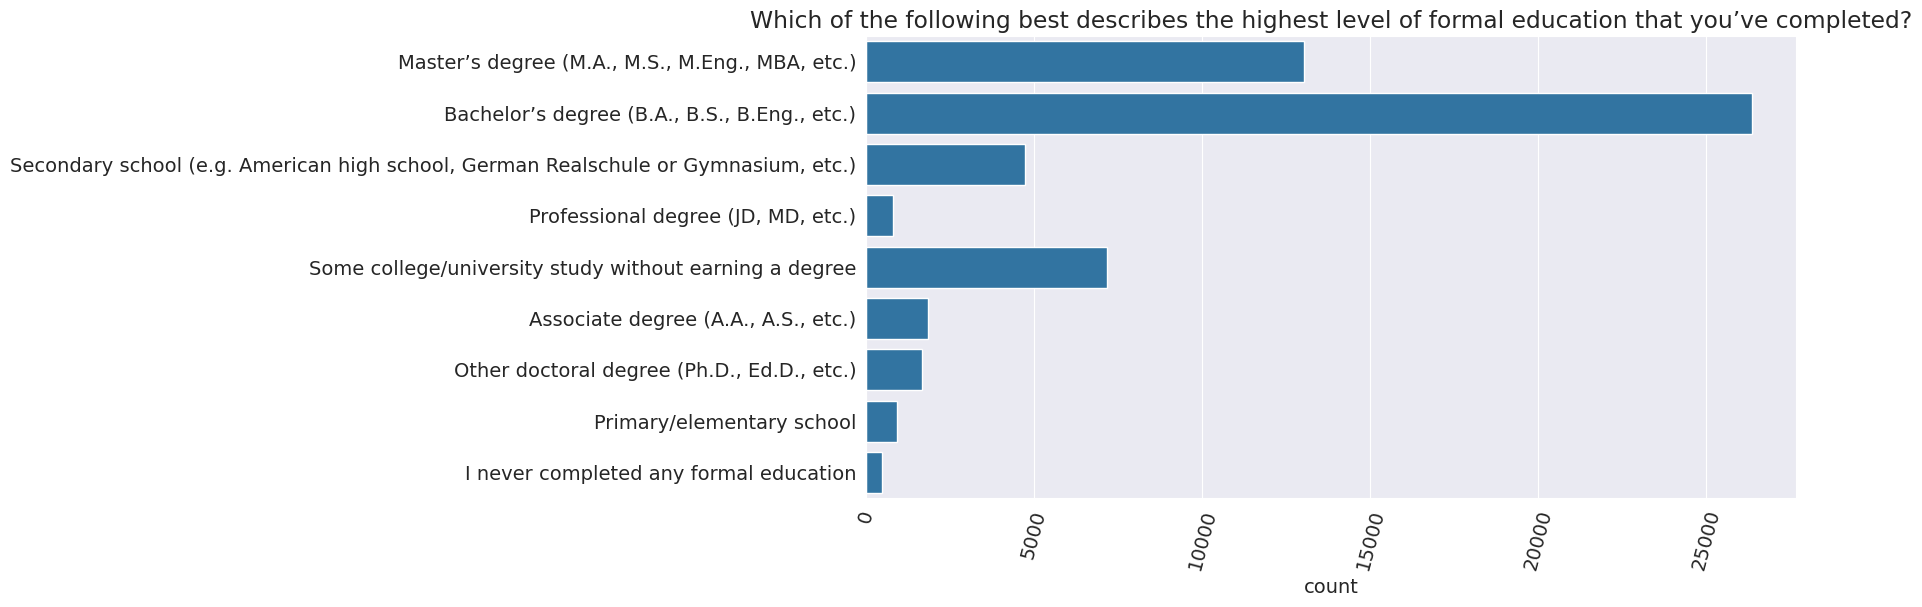

In [770]:
plt.figure(figsize=(12, 6))
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation = 75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers definitely seem to have some college education, although it's not clear from this graph alone if they hold a degree in computer science.

**Exercise**: The graph currently shows the number of respondents for each option, can you modify it to show the percentage instead? Further, can you break down the graph to compare the percentages for each degree for men vs. women.

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages, and sort by percentage values to make it easier to visualize the order.

In [771]:
schema.UndergradMajor

'What was your primary field of study?'

In [772]:
survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

,count
UndergradMajor,
"Computer science, computer engineering, or software engineering",61.939193
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",9.354195
"Information systems, information technology, or system administration",7.983168
"A natural science (such as biology, chemistry, physics, etc.)",4.316561
Mathematics or statistics,3.627097
Web development or web design,3.502637
"A business discipline (such as accounting, finance, marketing, etc.)",2.700567
"A humanities discipline (such as literature, history, philosophy, etc.)",1.969616
"A social science (such as anthropology, psychology, political science, etc.)",1.821450


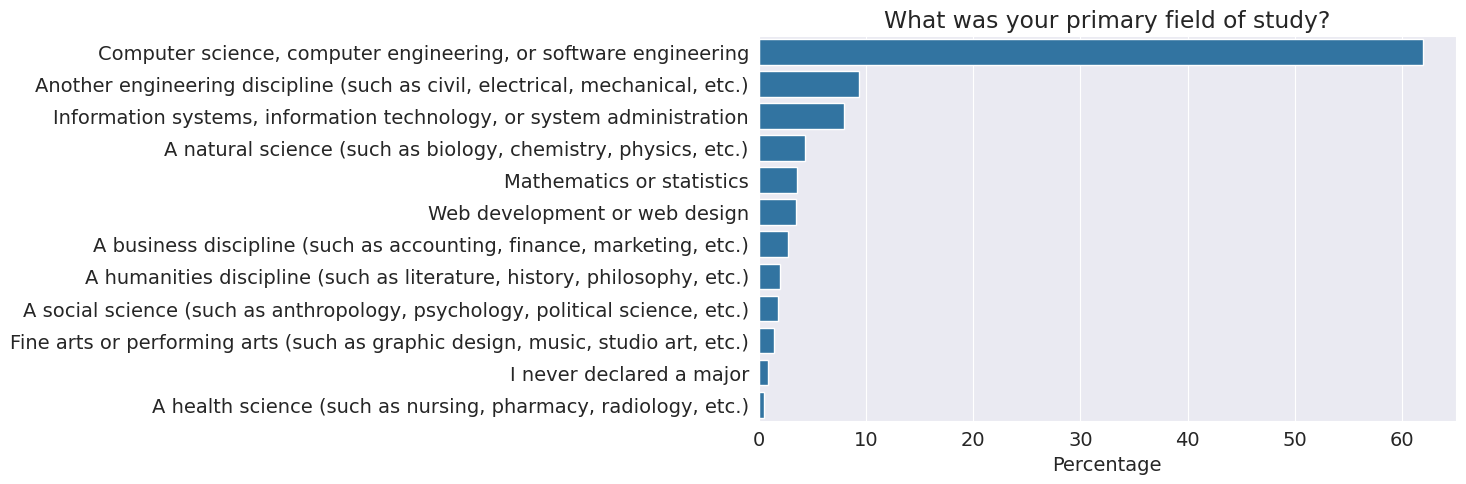

In [773]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(y = undergrad_pct.index, x = undergrad_pct);
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. This seems to suggest that while college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

**Exercise**: Analyze the results of the NEWEdImpt column for respondents who hold some college degree vs. those who don't. Do you notice any difference in opinion?

## Employment

Freelancing or contract work is a common choice among programmer, so it would be interesting to compare the breakdown between full time, part time & freelance work. Let's visualize the data from Employment column.

In [774]:
schema.Employment

'Which of the following best describes your current employment status?'

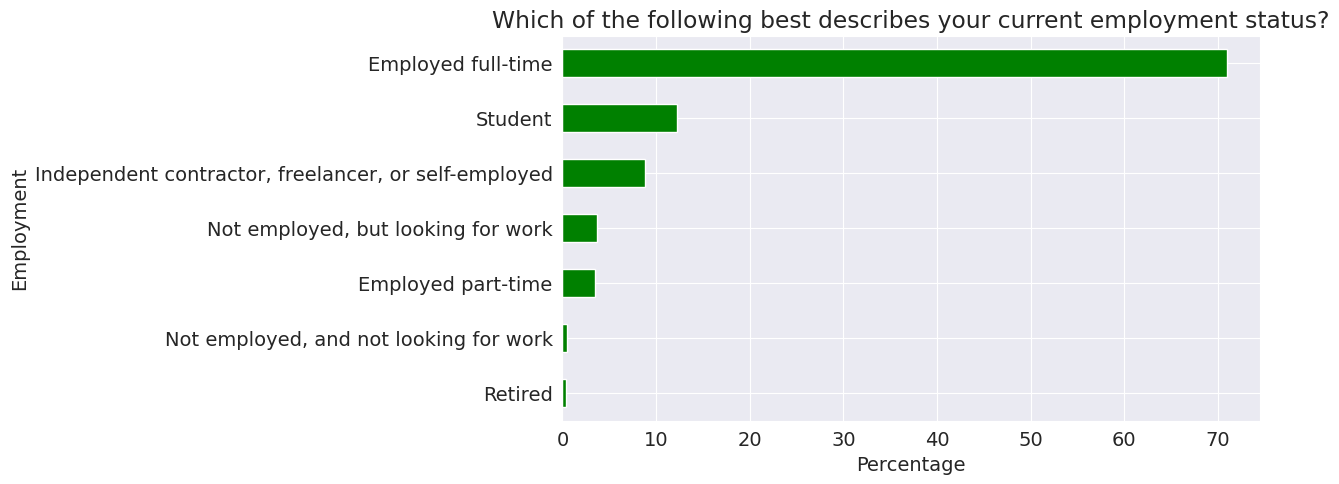

In [775]:
(survey_df.Employment.value_counts(normalize = True, ascending = True) * 100).plot(kind = 'barh', color = 'g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers.

**Exercise**: Add a new column EmploymentType which contains values Enthusiast(student or not employed but looking for work), Professional(employed full-time, part-time or freelancing) and Other(not employed or retired). For each of the graphs that follow, show a comparison between Enthusiast and Professional.

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by ; which makes it a bit harder to analyze directly.

In [776]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [777]:
survey_df.DevType.value_counts()

,count
DevType,
"Developer, full-stack",4396
"Developer, back-end",3056
"Developer, back-end;Developer, front-end;Developer, full-stack",2214
"Developer, back-end;Developer, full-stack",1465
"Developer, front-end",1390
...,...
"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Developer, QA or test;Senior executive/VP",1
"Database administrator;Developer, back-end;Developer, front-end;Developer, full-stack;Product manager;Senior executive/VP",1
"Developer, back-end;Developer, full-stack;Developer, mobile;DevOps specialist;Educator;System administrator",1


Let's define a helper function which turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [778]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].items():
        # Break each value (list of options) into a list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Markk the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [779]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [780]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a responded has selected the option, the value in the column is True, otherwise it's false.

We can now use the column-wise totals to identify the most common rules.

In [781]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)
dev_type_totals

,0
"Developer, back-end",26996
"Developer, full-stack",26915
"Developer, front-end",18128
"Developer, desktop or enterprise applications",11687
"Developer, mobile",9406
DevOps specialist,5915
Database administrator,5658
Designer,5262
System administrator,5185
"Developer, embedded applications or devices",4701


As one might expect, the most common roles include *Developer* in the name.

**Exercises**:

* Can you figure out what percentage of respondents work in roles of related to data science?
* Which role has the highest percentage of women?

# Asking and Answering Questions

We've already gained several insights about the respondents and the programming community in general, simply by exploring individual columns of the dataset. Let's ask some specific questions, and try to answer them using data frame operations and interesting visualizatons.

**Q: Which were the most popular programming languages in 2020?**

To answer, this we can use the LanguageWorkedWith column. Similar to DevType respondents were allowed to choose multiple options here.

In [782]:
survey_df.LanguageWorkedWith

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,NaN
4,HTML/CSS;Ruby;SQL
...,...
64456,NaN
64457,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458,NaN
64459,HTML/CSS


FIrst, we'll split this column into a data frame containing a column of each languages listed in the options.

In [783]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [784]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.

In [785]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending = False) * 100
languages_worked_percentages

,0
JavaScript,59.893323
HTML/CSS,55.801947
SQL,48.444935
Python,39.001026
Java,35.618760
Bash/Shell/PowerShell,29.239884
C#,27.803004
PHP,23.130035
TypeScript,22.461357
C++,21.114670


We can plot this information using a horizontal bar chart.

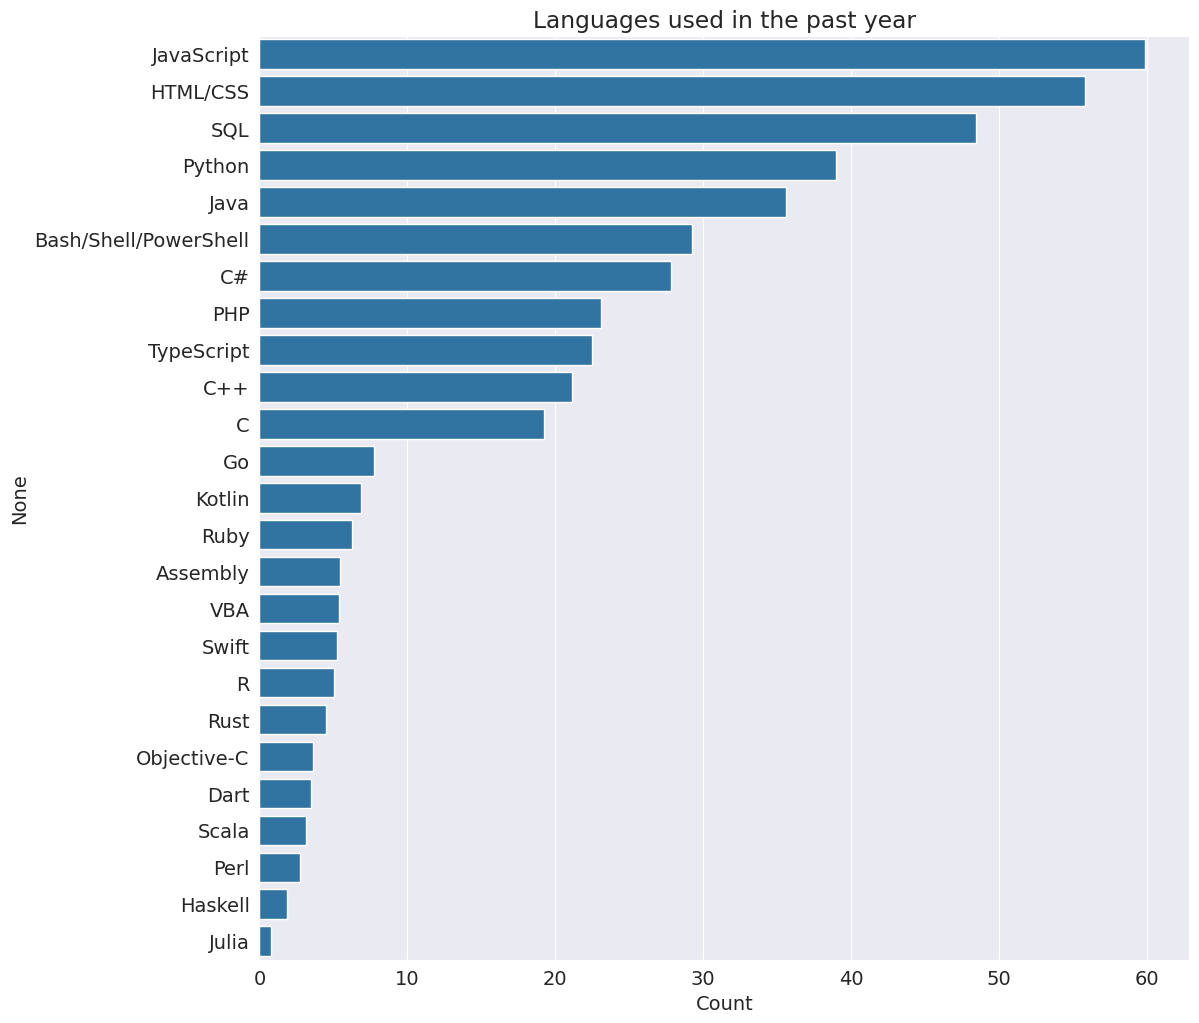

In [786]:
plt.figure(figsize = (12, 12))
sns.barplot(y = languages_worked_percentages.index, x = languages_worked_percentages)
plt.title("Languages used in the past year");
plt.xlabel('Count');

Perhaps not surprisingly, Javascript & HTML/CSS comes out at the top as web development is one of the most sort skills today and it also happens to be the easiest to get started with. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL on a regular basis. For other forms of development, Python seems to be the popular choice, beating out Java, which was the industry standard for server & application development for over 2 decades.

**Exercises**:

* What are the most common languages used by students? How does the list compare with the most common languages used by professional developers?
* What are the most common languages amongt respondents who do not describe themselves as "Developer, front-end"?
* What are the most common languages among respondents who work in fields related to data science?
* What are the most common languages used by developers older than 35 years of age?
* What are the most common languages used by developers in your home country?

**Which languages are the most people interestesd to learn over the next year?**

For this we can use the LanguageDesireNextYear column, with similar processing as the previous one.

In [787]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending = False) * 100
languages_interested_percentages

,0
Python,41.143906
JavaScript,40.425466
HTML/CSS,32.028116
SQL,30.799614
TypeScript,26.451653
C#,21.058688
Java,20.464653
Go,19.432090
Bash/Shell/PowerShell,18.057413
Rust,16.270643


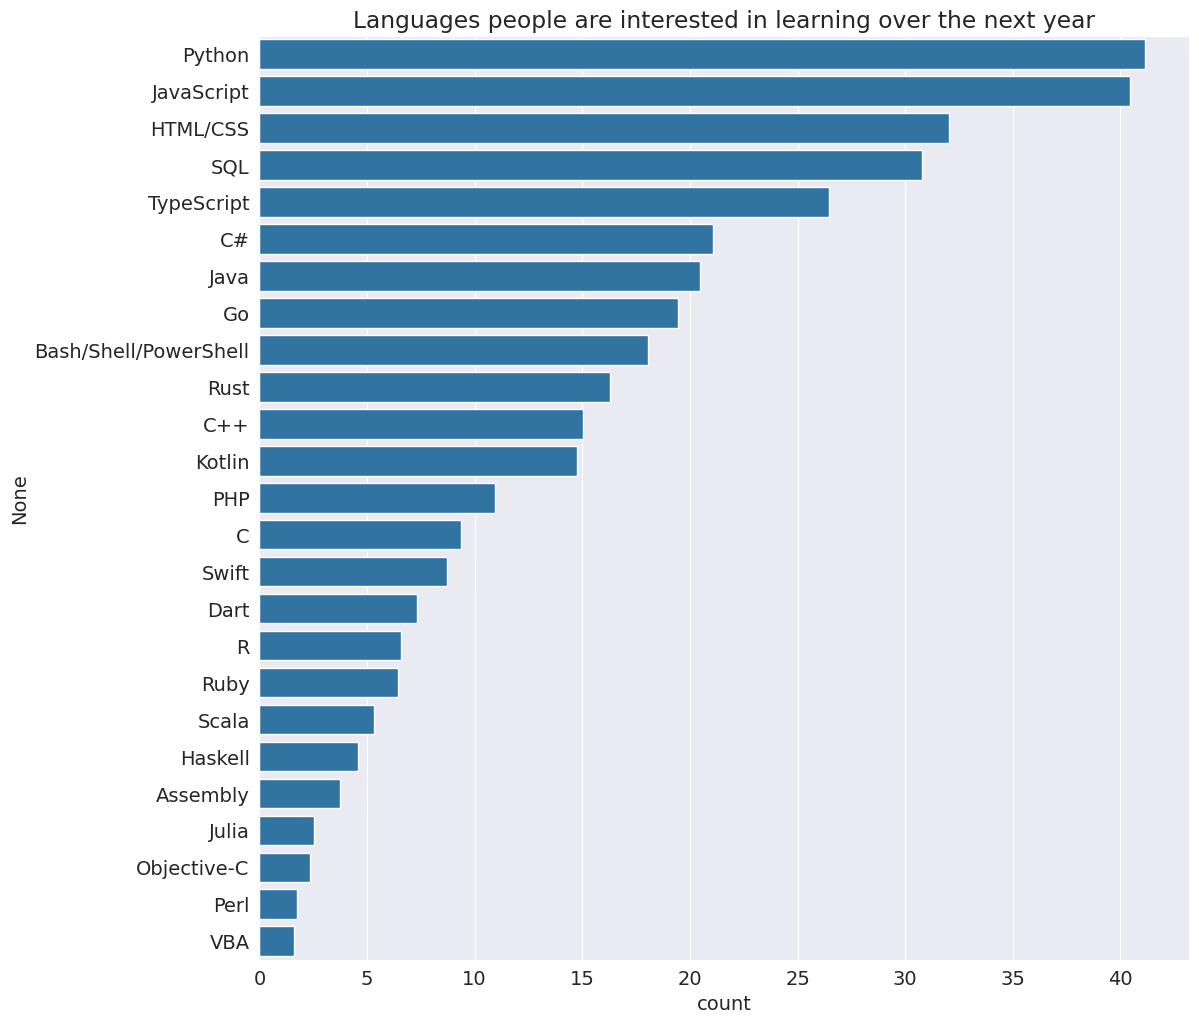

In [788]:
plt.figure(figsize = (12, 12))
sns.barplot(y = languages_interested_percentages.index, x = languages_interested_percentages)
plt.title("Languages people are interested in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning- since it is an easy-to-learn general purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting e.t.c. We're using Python for this very analysis, so we're in good company!

**Exercises**: Repeat all the exercises for the previous question, replacing "most common languages" with "languages people are interested in learning/using".

**Q: Which are the most loved languages i.e. a high percentage of people who have used the language want to continue learning & using it over the next year?**

While this question may seem tricky at first, it's really easy to solve using Python array operations.

Here's what we can do:

* Create a new data frame languages_loved_df which contains a True value for a language only if the corresponding values in languages_worked_df and languages_interested_df are both True
* Take the column wise sum of languages_loved_df and divide it by the column-wise sum of languages_worked_df to get the percentages of respondents who "love" the language
* Sort the results in decreasing order and plot a horizontal bar graph

In [789]:
languages_loved_df = languages_worked_df & languages_interested_df

In [790]:
languages_loved_percentages = (languages_loved_df.sum() * 100 / languages_worked_df.sum()).sort_values(ascending = False)

In [791]:
languages_loved_percentages

,0
Rust,86.069824
TypeScript,67.114373
Python,66.598884
Kotlin,62.813276
Go,62.176789
Dart,62.068966
Julia,61.431412
C#,59.623021
Swift,59.476346
JavaScript,58.353888


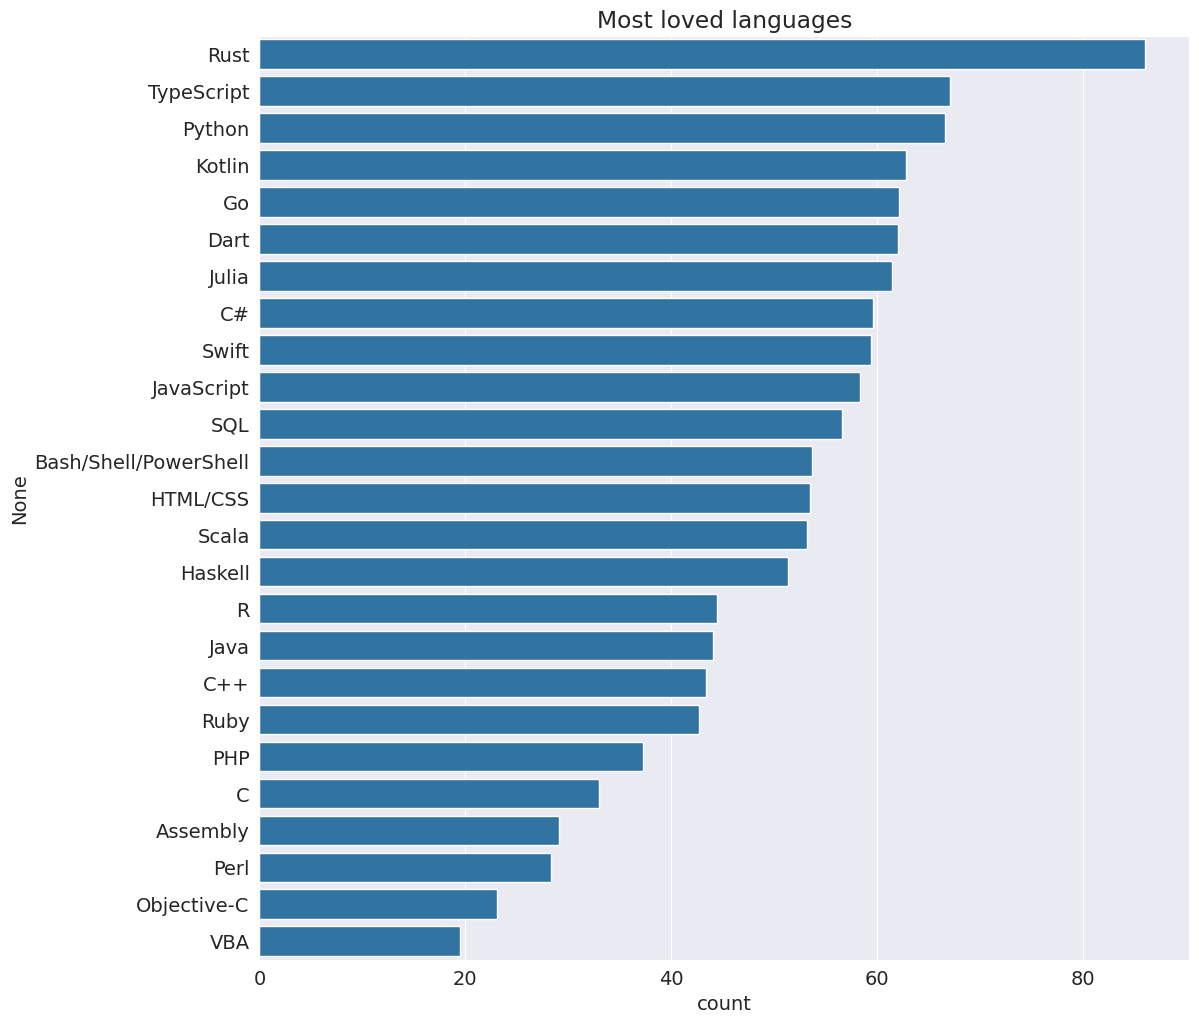

In [792]:
plt.figure(figsize = (12, 12))
sns.barplot(y = languages_loved_percentages.index, x = languages_loved_percentages)
plt.title("Most loved languages");
plt.xlabel('count');

Rust has been StackOverflow's most-loved language for 4 years in a row, followed by TypeScript which has gained a lot of popularity in the past few years as a good alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in world. This is testament to the fact the language has solid foundation, is really easy to learn & use, has a strong eco system of libraries for various and massive worldwide community of developers to enjoy using it.

**Exercises**: What are the most dreaded languages i.e. languages which people have used in the past year, but do not want to learn/use over the next year. Hint: -languages_interested_df

**Q: In which counties do developers work the highest number of hours per week? Consider countries with more than 250 responses only.**

To answer this question, we'll need to use the groupby data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries which have more than 250 respondents.

In [793]:
survey_df.groupby('Country')[['WorkWeekHrs', 'Age']].mean()

,WorkWeekHrs,Age
Country,,
Afghanistan,46.500000,23.571429
Albania,43.962963,26.766667
Algeria,36.862069,28.019608
Andorra,42.000000,39.000000
Angola,24.500000,25.500000
...,...,...
"Venezuela, Bolivarian Republic of...",40.125000,29.090909
Viet Nam,41.391667,25.786585
Yemen,40.000000,31.000000


In [794]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending = False)

In [795]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [796]:
high_reponse_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [797]:
high_reponse_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China & Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall and the average working hours seem to be around 40 hours per week.

**Exercises**:

* How do the average work hours compare across continents? You may find this list of  countries in each continent useful.
* Which role has the highest average number of hours worked per week? Which role has the lowest?
* How do the hours worked compared between freelancers and developers working full-time?

**Q: How important is it to start young to build a career in programming?**

Let's create a scatter plot of Age vs. YearsCodePro (i.e. years of coding experience) to answer this question.

In [798]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

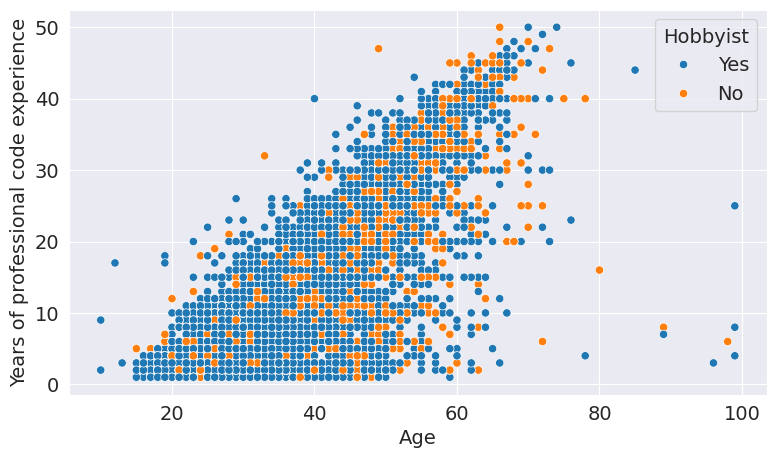

In [799]:
sns.scatterplot(x='Age', y='YearsCodePro', hue = 'Hobbyist', data = survey_df)
plt.xlabel('Age')
plt.ylabel('Years of professional code experience');

You can see points all over the graph, which seems to indicate that you can **start programming professionally at any age**. Also, many people who have been coding for several decades professionally also seem to enjoy it has a hobby.

We can also view the distribution of Age1stCode column to see when the respondents tried programming for the first time.

<ipython-input-800-a6c092805651>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survey_df.Age1stCode);


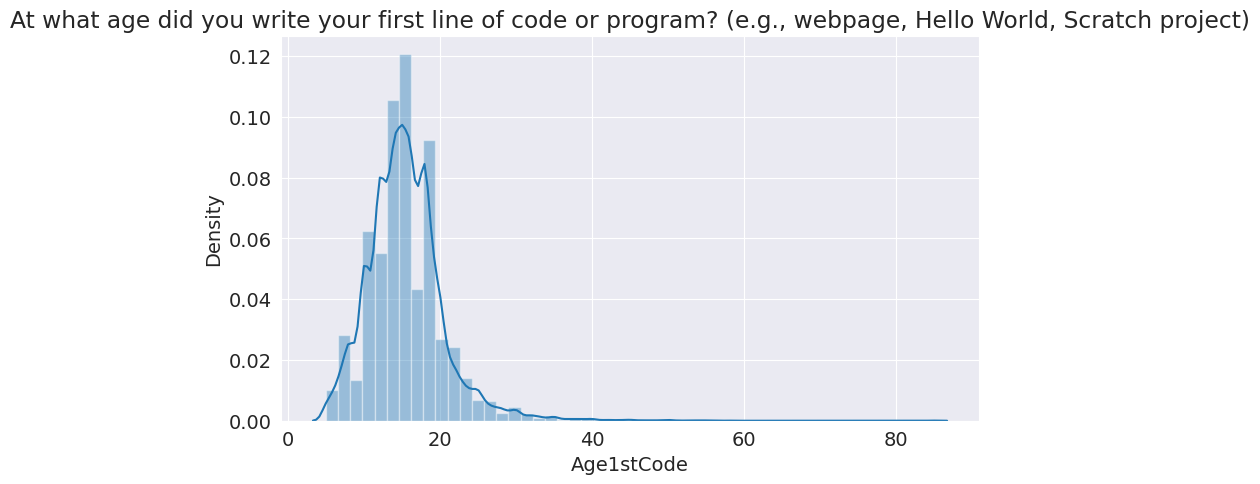

In [800]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode);

As you might expect, most people seem to have had some exposure to programming before the age of 40, but there are people of all ages and walks of life who are learning to code.

**Exercises**

* How does experience change opinion & preferences? Repeat the entire analysis while comparing the responses of people who have more than 10 years of professional programming experience v.s. those who don't. Do you see any intresting trends?
* Compare the years of professional coding experience across different genders.

We've basically scratched the surface here, and hopefully you are already thinking of many more questions that you'd like to answer using this data.

## Inferences and Conclusions

We've drawn many interesting inferences from the survey, here's a summary of the few of them:

* Based on the demographics of the survey respondents, we can infer that the survey is somewhat representative of the overall programming community, although it definitely has fewer responses from programmers in non-English speaking countries and from women & non-binary genders.
* The programming community is not as diverse as it be, and although things are improving, we should take more efforts to support & encourage members of underrepresented communities - whether it is in terms of age, country, race, gender or otherwise.
* Most programmers hold a college degree, although a fairly large percentage did not have computer science as their major in college, so a computer science degree isn't compulsory for learning to code or building a career in programming.
* A significant percentage of programmers either work part time or as freelancers, and this can be a great way to break into the field, especially when you're just getting started.
* Javascript & HTNL/CSS are the most used programming languages in 2020, closely followed by SQl & Python.
* Python is the language most people are interested in learning - since it is an easy-to-learn general purpose programming language well suited for a variety of domains.
* Rust and Typescript are the most *loved* languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.
* Programmers around the world seems to be working for around 40 hours a week on average, with slight variations by country.
* You can learn and start programming professionally at any age, and you're likely to have a long and fufilling career if you also enjoy programming as a hobby.

## References and Future Work

There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for exploration:

* Repeat the analysis for different age groups & genders, and compare the results
* Choose a different set of columns(we chose on 20 out of 65) to analyze other facets of the data
* Prepare an analysis focusing on diversity - and identify areas where underrepresented communities are at par with the majority(e.g education) and where they aren't(e.g. salaries)
* Compare the results of this year's survey with the previous years and identify interesting trends.